In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.multicomp import MultiComparison

In [2]:
df = pd.read_excel('Modal Split EU.xlsx')
df

,Country,City,Walking (%),Bicycle (%),Public Transport (%),Private Vehicle (%),Other (%),Year,Source (Modal Split),Metro Population,...,Elderly (%),Sunshine per Day (hours),Coldest Month (oC),Warmest Month (oC),Average Temperature (oC),Rain (litre/m2),Number of Shared Bikes,Monthly Ticket Cost (€),Yearly Ticket Cost (€),GDP / Ticket Cost
0,Austria,Vienna,35.0,9.0,30.0,26.0,0.0,2022,https://presse.wien.gv.at/2023/03/23/wiener-li...,2907905,...,17.959596,5.30,3.3,20.5,11.90,669.0,3000.0,51.00,612.0,73.692810
1,Belgium,Antwerp,3.0,13.0,21.0,56.0,7.0,2011,Eurostat,1067117,...,19.193022,5.00,4.2,17.6,10.90,759.8,4200.0,49.00,588.0,89.115646
2,Belgium,Brussels,18.0,3.0,35.0,42.0,2.0,2020,Delloitte,3348154,...,17.358222,5.00,4.0,17.6,10.80,815.7,4115.0,49.00,588.0,90.476190
3,Bulgaria,Sofia,21.0,2.0,37.0,36.0,4.0,2020,https://www.iurc.eu/wp-content/uploads/2022/01...,1659069,...,18.735327,6.22,-0.5,21.2,10.35,522.0,NaN,35.80,429.6,40.270019
4,Croatia,Zagreb,30.0,4.0,41.0,25.0,0.0,2012,https://www.researchgate.net/figure/Comparison...,1187450,...,20.819908,5.24,0.3,20.6,10.45,918.2,100.0,53.10,637.2,29.190207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,United Kingdom,Cardiff,16.1,3.8,14.2,65.3,0.6,2011,Eurostat,1140165,...,18.114922,4.00,4.3,16.3,10.30,1093.2,NaN,68.20,818.4,32.101662
77,United Kingdom,Leicester,17.5,3.8,15.4,62.7,0.6,2011,Eurostat,1443399,...,18.686171,4.00,3.9,17.4,10.65,673.2,NaN,74.70,896.4,28.060018
78,United Kingdom,Liverpool (NW),13.2,2.1,26.0,58.0,0.7,2011,Eurostat,2049940,...,19.321151,4.20,4.2,17.0,10.60,942.6,NaN,75.60,907.2,30.633818
79,United Kingdom,Manchester (NW),25.0,5.0,18.0,52.0,0.0,2020,Delloitte,3712997,...,17.399287,3.10,2.6,16.2,9.40,984.8,NaN,107.00,1284.0,25.881620


In [3]:
# Rename the columns in the DataFrame
df.rename(columns={
    "Walking (%)": "Walking",
    "Bicycle (%)": "Bicycle",
    "Public Transport (%)": "Public_Transport",
    "Private Vehicle (%)": "Private_Vehicle"
}, inplace=True)

# Display the first few rows to verify the changes
df.head()

,Country,City,Walking,Bicycle,Public_Transport,Private_Vehicle,Other (%),Year,Source (Modal Split),Metro Population,...,Elderly (%),Sunshine per Day (hours),Coldest Month (oC),Warmest Month (oC),Average Temperature (oC),Rain (litre/m2),Number of Shared Bikes,Monthly Ticket Cost (€),Yearly Ticket Cost (€),GDP / Ticket Cost
0,Austria,Vienna,35.0,9.0,30.0,26.0,0.0,2022,https://presse.wien.gv.at/2023/03/23/wiener-li...,2907905,...,17.959596,5.30,3.3,20.5,11.90,669.0,3000.0,51.0,612.0,73.692810
1,Belgium,Antwerp,3.0,13.0,21.0,56.0,7.0,2011,Eurostat,1067117,...,19.193022,5.00,4.2,17.6,10.90,759.8,4200.0,49.0,588.0,89.115646
2,Belgium,Brussels,18.0,3.0,35.0,42.0,2.0,2020,Delloitte,3348154,...,17.358222,5.00,4.0,17.6,10.80,815.7,4115.0,49.0,588.0,90.476190
3,Bulgaria,Sofia,21.0,2.0,37.0,36.0,4.0,2020,https://www.iurc.eu/wp-content/uploads/2022/01...,1659069,...,18.735327,6.22,-0.5,21.2,10.35,522.0,NaN,35.8,429.6,40.270019
4,Croatia,Zagreb,30.0,4.0,41.0,25.0,0.0,2012,https://www.researchgate.net/figure/Comparison...,1187450,...,20.819908,5.24,0.3,20.6,10.45,918.2,100.0,53.1,637.2,29.190207


In [4]:
# Select the dependent variables and name it modal_split
modal_split = df[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]

# Get descriptive statistics and round to 2 decimal places
modal_split.describe().round(2)

,Walking,Bicycle,Public_Transport,Private_Vehicle
count,81.00,81.00,81.00,81.00
mean,15.36,7.34,27.88,48.76
std,11.19,8.30,11.19,14.65
min,3.00,0.29,6.71,4.00
25%,7.80,2.00,20.60,39.00
50%,11.05,4.30,26.00,50.60
75%,19.00,9.60,35.00,59.17
max,60.00,47.00,59.00,83.69


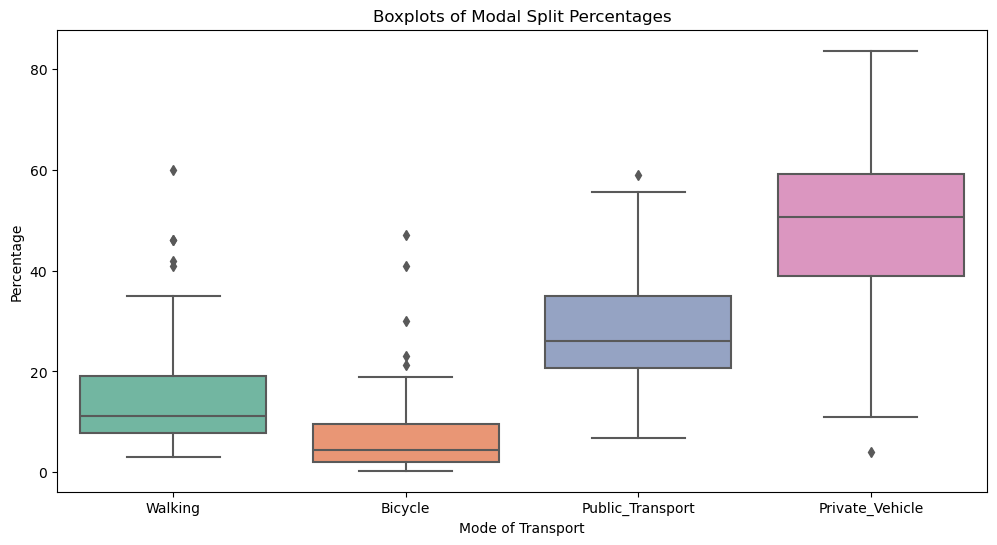

In [5]:
# Create a dataframe for the four modal split columns
df_modal_split_boxplot = df[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]

# Melt the dataframe to have a long-form structure suitable for Seaborn
df_melted = df_modal_split_boxplot.melt(var_name='Mode', value_name='Percentage')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode', y='Percentage', data=df_melted, palette='Set2')
plt.title('Boxplots of Modal Split Percentages')
plt.xlabel('Mode of Transport')
plt.ylabel('Percentage')
plt.show()


In [6]:
df.head()

,Country,City,Walking,Bicycle,Public_Transport,Private_Vehicle,Other (%),Year,Source (Modal Split),Metro Population,...,Elderly (%),Sunshine per Day (hours),Coldest Month (oC),Warmest Month (oC),Average Temperature (oC),Rain (litre/m2),Number of Shared Bikes,Monthly Ticket Cost (€),Yearly Ticket Cost (€),GDP / Ticket Cost
0,Austria,Vienna,35.0,9.0,30.0,26.0,0.0,2022,https://presse.wien.gv.at/2023/03/23/wiener-li...,2907905,...,17.959596,5.30,3.3,20.5,11.90,669.0,3000.0,51.0,612.0,73.692810
1,Belgium,Antwerp,3.0,13.0,21.0,56.0,7.0,2011,Eurostat,1067117,...,19.193022,5.00,4.2,17.6,10.90,759.8,4200.0,49.0,588.0,89.115646
2,Belgium,Brussels,18.0,3.0,35.0,42.0,2.0,2020,Delloitte,3348154,...,17.358222,5.00,4.0,17.6,10.80,815.7,4115.0,49.0,588.0,90.476190
3,Bulgaria,Sofia,21.0,2.0,37.0,36.0,4.0,2020,https://www.iurc.eu/wp-content/uploads/2022/01...,1659069,...,18.735327,6.22,-0.5,21.2,10.35,522.0,NaN,35.8,429.6,40.270019
4,Croatia,Zagreb,30.0,4.0,41.0,25.0,0.0,2012,https://www.researchgate.net/figure/Comparison...,1187450,...,20.819908,5.24,0.3,20.6,10.45,918.2,100.0,53.1,637.2,29.190207


# Metropolitan City Density Categories

1) Low: 0 - 500 people/km²
2) Medium: 500 - 1000 people/km²
3) High: above 1000 people/km²

In [7]:
df[["Metro Density (people/km2)"]].describe().round(2)

,Metro Density (people/km2)
count,81.00
mean,579.52
std,490.83
min,56.00
25%,237.00
50%,370.00
75%,799.00
max,2545.00


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


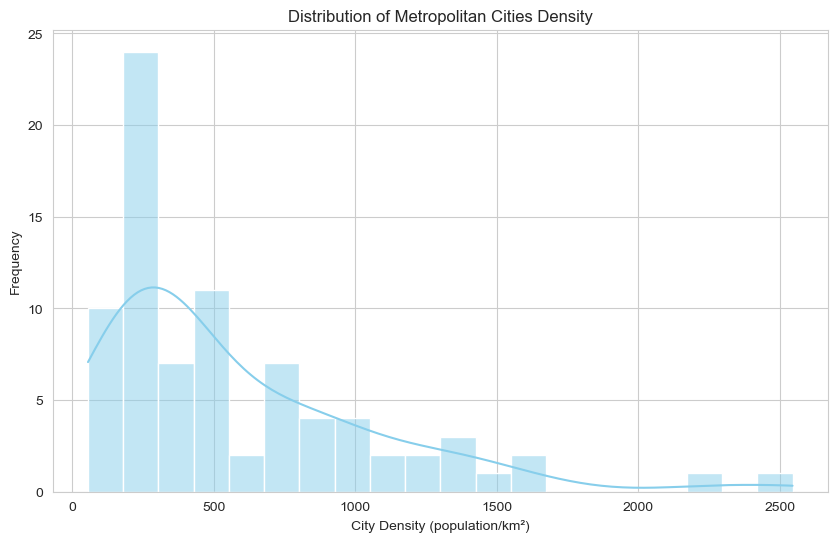

In [8]:
# Set the style for the plot (optional)
sns.set_style("whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Metro Density (people/km2)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Metropolitan Cities Density')
plt.xlabel('City Density (population/km²)')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Categorize "Metro Density (people/km²)" into Low, Medium, and High
df['Metro_Density_Category'] = pd.cut(df['Metro Density (people/km2)'], 
                                       bins=[0, 500, 1000, np.inf], 
                                       labels=['Low', 'Medium', 'High'],
                                       right=False)  # To include the right endpoint in the interval

# Check the unique values in the new categorical column
print(df['Metro_Density_Category'].unique())

['Low', 'High', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [10]:
# Perform one-way MANOVA
manova_model = MANOVA.from_formula(formula='Walking + Bicycle + Public_Transport + Private_Vehicle ~ Metro_Density_Category', data=df)

# Print the MANOVA results
print(manova_model.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0004 4.0000 75.0000 48793.8947 0.0000
         Pillai's trace    0.9996 4.0000 75.0000 48793.8947 0.0000
 Hotelling-Lawley trace 2602.3411 4.0000 75.0000 48793.8947 0.0000
    Roy's greatest root 2602.3411 4.0000 75.0000 48793.8947 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
  Metro_Density_Category  Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.8487  8.0000  150.0000   1.6025  0.1285
          Pi

Δεν υπάρχει στατιστικά σημαντικό εύρημα. Επομένως, η πυκνότητα πληθυσμού δεν επηρεάζει το Modal Split.

# Elderly Population Categories

1) Young Population: Below 17.5% Elderly
2) Moderate Elderly Population: 17.5% - 20% Elderly
3) High Elderly Population: Above 20% Elderly

Πηγή κατηγοριών: https://ec.europa.eu/eurostat/documents/4187653/10321595/Elderly_v6.png/aec4c227-e79b-9dbe-8ae5-5ed51bc1f9bc?t=1585576174568

In [11]:
# Define the bins and labels for the categories
bins = [0, 17.5, 20, df['Elderly (%)'].max()]
labels = ['Young Population', 'Moderate Elderly Population', 'High Elderly Population']

# Create a new column with the categories for the elderly population percentages
df['Elderly_Category'] = pd.cut(df['Elderly (%)'], bins=bins, labels=labels, include_lowest=True)

# Check the unique values in the new categorical column
print(df['Elderly_Category'].unique())

['Moderate Elderly Population', 'Young Population', 'High Elderly Population']
Categories (3, object): ['Young Population' < 'Moderate Elderly Population' < 'High Elderly Population']


In [12]:
# Count the number of occurrences of each category in the "Elderly_Category" column
elderly_category_counts = df['Elderly_Category'].value_counts()

# Print the count for each category
print("Count for each category in Elderly_Category:")
print(elderly_category_counts)

Count for each category in Elderly_Category:
Elderly_Category
High Elderly Population        35
Moderate Elderly Population    33
Young Population               13
Name: count, dtype: int64


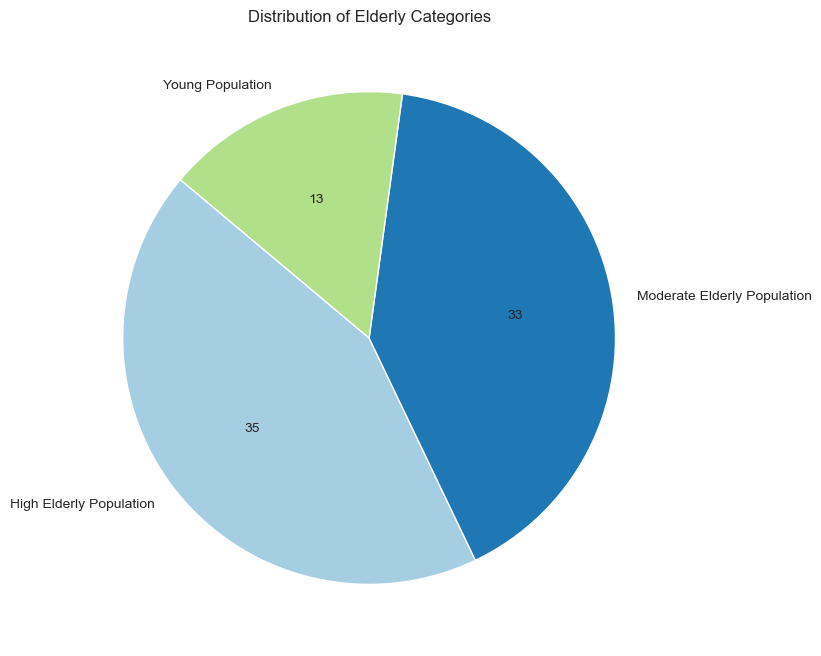

In [13]:
# Count the occurrences of each category
elderly_category_counts = df['Elderly_Category'].value_counts()

# Function to display the count on the pie chart
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute}"

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(elderly_category_counts, labels=elderly_category_counts.index, autopct=lambda pct: func(pct, elderly_category_counts), startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Elderly Categories')
plt.show()

In [14]:
# Perform one-way MANOVA for Elderly_Category as the independent variable
manova_model = MANOVA.from_formula(formula='Walking + Bicycle + Public_Transport + Private_Vehicle ~ Elderly_Category', data=df)

# Print the MANOVA results
print(manova_model.mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value   Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0014 4.0000 75.0000 13149.3014 0.0000
         Pillai's trace   0.9986 4.0000 75.0000 13149.3014 0.0000
 Hotelling-Lawley trace 701.2961 4.0000 75.0000 13149.3014 0.0000
    Roy's greatest root 701.2961 4.0000 75.0000 13149.3014 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
        Elderly_Category    Value  Num DF  Den DF  F Value Pr > F
-----------------------------------------------------------------
              Wilks' lambda 0.8714 8.0000 150.0000  1.3363 0.2297
             Pillai's trace 0.

Οι τιμές p που συσχετίζονται με αυτά τα στατιστικά στοιχεία είναι όλες πάνω από 0,05, υποδεικνύοντας ότι δεν υπάρχουν σημαντικές διαφορές στα ποσοστά διαχωρισμού των τρόπων μεταφοράς ανάλογα με το ποσοστό του πληθυσμού που ανήκει στην κατηγορία των ηλικιωμένων.

# Sunshine Categories

1) Low Sunshine: Below 5.5 hours per day
2) Moderate Sunshine: 5.5 - 6.8 hours per day
3) High Sunshine: Above 6.8

Οι κατηγορίες προκύπτουν διαιρώντας 2000, 2500 και 3000 ώρες ηλιοφάνειας τον χρόνο με τις 365 ημέρες του χρόνου.

In [15]:
# Define the bins and labels for the categories
bins = [0, 5.5, 6.8, float('inf')]
labels = ['Low Sunshine', 'Moderate Sunshine', 'High Sunshine']

# Create a new column with the categories for the hours of sunshine
df['Sunshine_Category'] = pd.cut(df['Sunshine per Day (hours)'], bins=bins, labels=labels, include_lowest=True)

# Check the unique values in the new categorical column
print(df['Sunshine_Category'].unique())

['Low Sunshine', 'Moderate Sunshine', 'High Sunshine', NaN]
Categories (3, object): ['Low Sunshine' < 'Moderate Sunshine' < 'High Sunshine']


In [16]:
# Remove NaN values from the Sunshine_Category column
df_cleaned = df.dropna(subset=['Sunshine_Category'])

# Show the count for each category
category_counts = df_cleaned['Sunshine_Category'].value_counts()
print(category_counts)

Sunshine_Category
Low Sunshine         45
Moderate Sunshine    17
High Sunshine        17
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


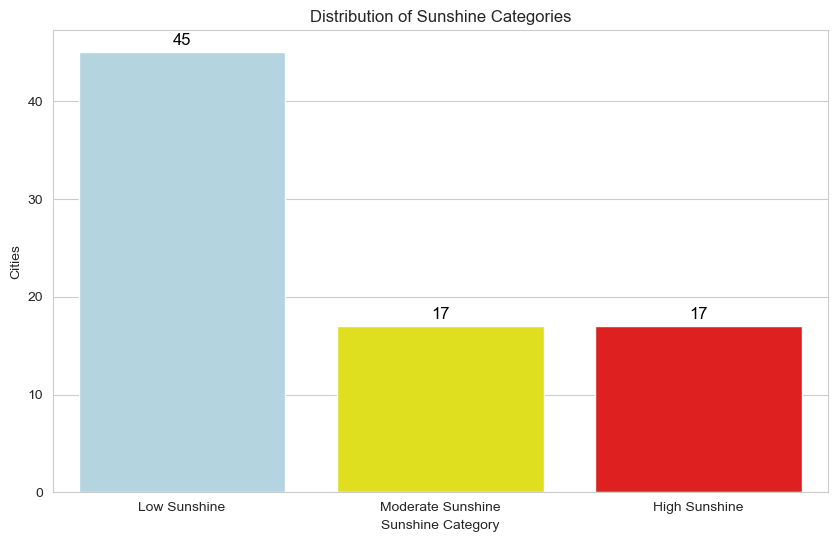

In [17]:
# Define the color palette in the desired order
colors = ['lightblue', 'yellow', 'red']

# Create a count plot for the Sunshine_Category
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Sunshine_Category', palette=colors)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Sunshine Categories')
plt.xlabel('Sunshine Category')
plt.ylabel('Cities')

# Show the plot
plt.show()

In [18]:
# Perform one-way MANOVA for Sunshine_Category as the independent variable
manova_model = MANOVA.from_formula(formula='Walking + Bicycle + Public_Transport + Private_Vehicle ~ Sunshine_Category', data=df_cleaned)

# Print the MANOVA results
print(manova_model.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0004 4.0000 73.0000 43993.3817 0.0000
         Pillai's trace    0.9996 4.0000 73.0000 43993.3817 0.0000
 Hotelling-Lawley trace 2410.5963 4.0000 73.0000 43993.3817 0.0000
    Roy's greatest root 2410.5963 4.0000 73.0000 43993.3817 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
    Sunshine_Category     Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.7213  8.0000  146.0000   3.2392  0.0020
          Pi

Οι τιμές p που σχετίζονται με αυτά τα στατιστικά στοιχεία είναι όλες μικρότερες από 0,05, υποδεικνύοντας ότι υπάρχουν σημαντικές διαφορές στα ποσοστά διαιρέσεως των τρόπων μεταφοράς μεταξύ των κατηγοριών της μεταβλητής "Sunshine_Category". Επομένως, οι ώρες ηλιοφάνειας επηρεάζουν σημαντικά τα ποσοστά των τρόπων μεταφοράς.

In [19]:
# Perform Tukey's HSD test for each significant dependent variable
for dep_var in ["Walking", "Bicycle", "Public_Transport", "Private_Vehicle"]:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df_cleaned[dep_var], groups=df_cleaned['Sunshine_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
High Sunshine      Low Sunshine  -9.1949 0.0091 -16.4349 -1.9549   True
High Sunshine Moderate Sunshine -11.4247 0.0069 -20.1477 -2.7017   True
 Low Sunshine Moderate Sunshine  -2.2298 0.7428  -9.4698  5.0102  False
-----------------------------------------------------------------------


Tukey HSD test results for Bicycle:

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
High Sunshine      Low Sunshine   6.6015 0.0137  1.1437 12.0592   True
High Sunshine Moderate Sunshine   3.0929 0.5021 -3.4827  9.6686  False
 Low Sunshine Moderate Sunshine  -3.5085 0.2797 -8.9662  1.9492  

Όσο μειώνεται η ηλιοφάνεια φαίνεται πως πέφτει το ποσοστό του περπατήματος ενώ αυξάνεται η επιλογή άλλων τρόπων μετακίνησης.

In [20]:
# Define the dependent variables
X = df_cleaned[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]

# Define the independent variable
y = df_cleaned['Sunshine_Category']

# Perform Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Define the column labels
columns = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Define the order of index
index_order = ['Low Sunshine', 'Moderate Sunshine', 'High Sunshine']

# Create a DataFrame for coefficients with labels
coefficients_df = pd.DataFrame(lda.coef_, columns=columns, index=index_order)

# Print the DataFrame
print("Coefficients of linear discriminants:")
print(coefficients_df)


Coefficients of linear discriminants:
                    Walking   Bicycle  Public_Transport  Private_Vehicle
Low Sunshine      -0.068311 -0.195576         -0.171389        -0.122054
Moderate Sunshine -0.004761  0.039827          0.024054         0.000519
High Sunshine      0.080914  0.090152          0.107718         0.120681


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

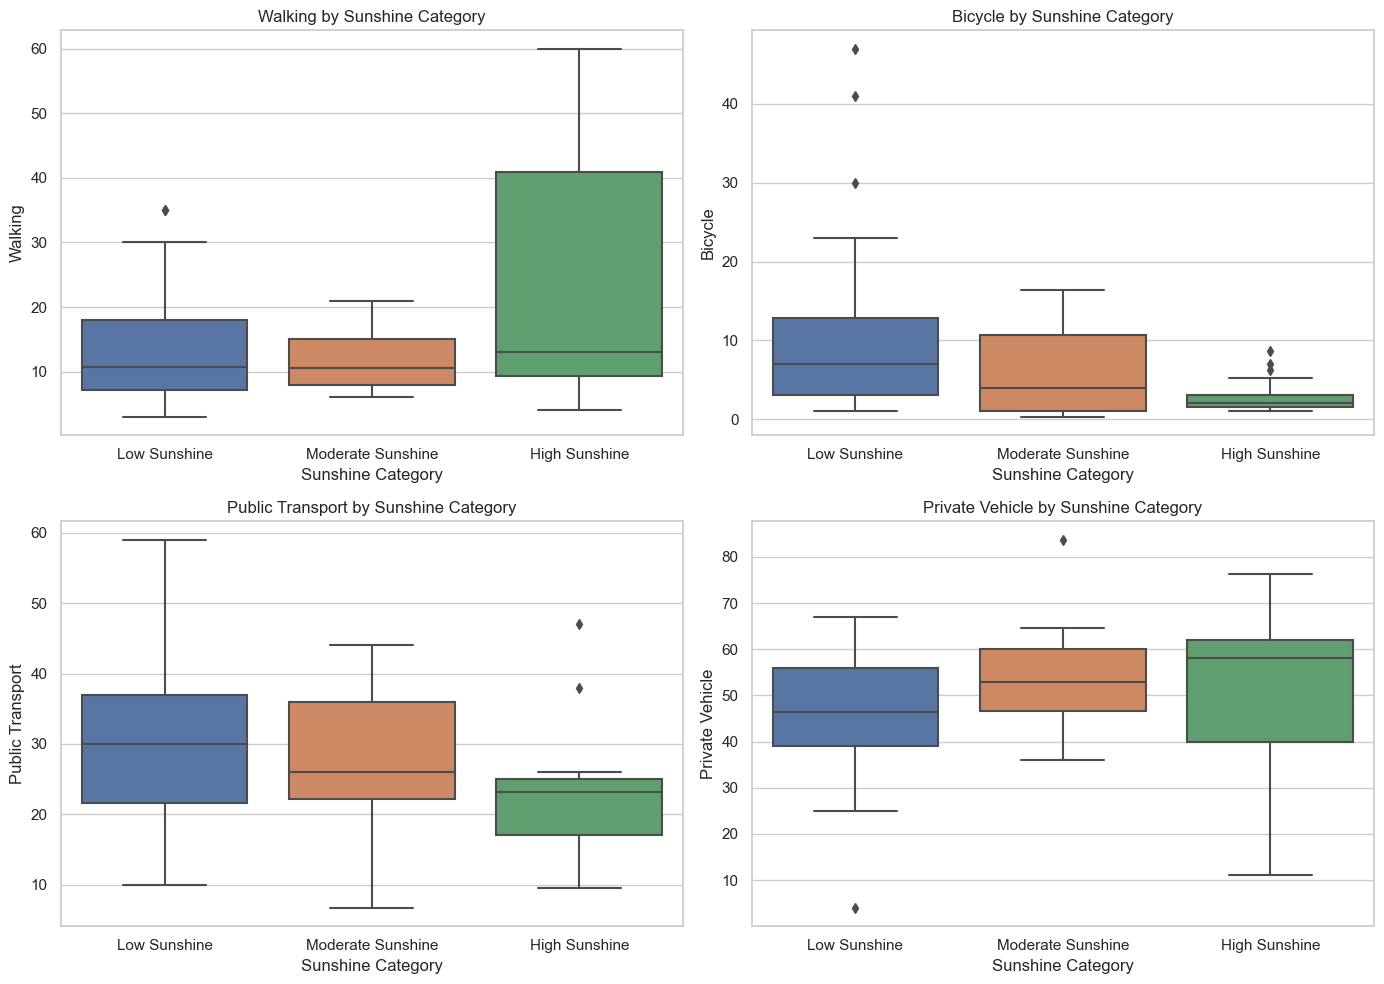

In [21]:
# Set the plot style
sns.set(style="whitegrid")

# Create box plots for each modal split percentage by sunshine category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='Sunshine_Category', y='Walking', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Walking by Sunshine Category')
axes[0, 0].set_xlabel('Sunshine Category')
axes[0, 0].set_ylabel('Walking')

sns.boxplot(x='Sunshine_Category', y='Bicycle', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Bicycle by Sunshine Category')
axes[0, 1].set_xlabel('Sunshine Category')
axes[0, 1].set_ylabel('Bicycle')

sns.boxplot(x='Sunshine_Category', y='Public_Transport', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Public Transport by Sunshine Category')
axes[1, 0].set_xlabel('Sunshine Category')
axes[1, 0].set_ylabel('Public Transport')

sns.boxplot(x='Sunshine_Category', y='Private_Vehicle', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Private Vehicle by Sunshine Category')
axes[1, 1].set_xlabel('Sunshine Category')
axes[1, 1].set_ylabel('Private Vehicle')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Average Temperature Categories

1) Very Cold: Below 5°C
2) Cold: 5°C to 10°C
3) Mild: 10°C to 15°C
4) Warm: Above 15°C

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


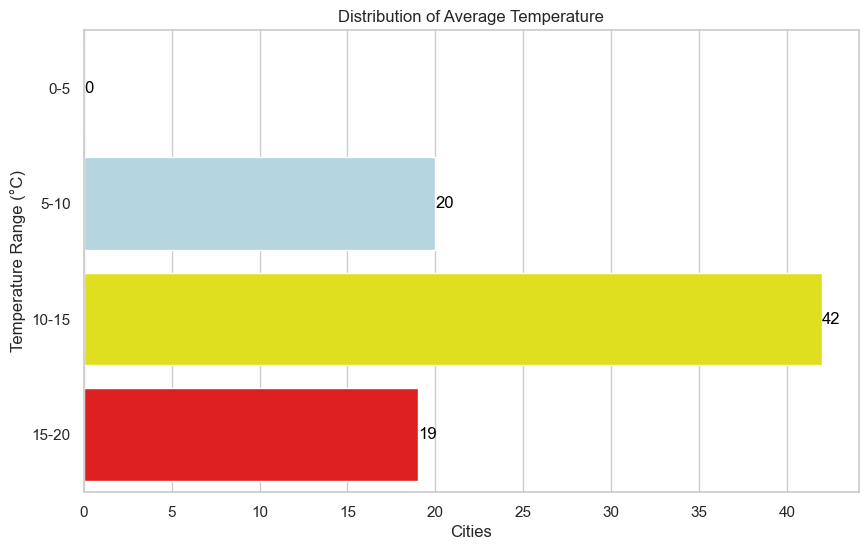

In [22]:
# Define the temperature categories and corresponding colors
temperature_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]
colors = ['blue', 'lightblue', 'yellow', 'red']

# Categorize the data and count occurrences in each category
counts = []
for temp_range in temperature_ranges:
    lower_bound, upper_bound = temp_range
    count = ((df['Average Temperature (oC)'] >= lower_bound) & (df['Average Temperature (oC)'] < upper_bound)).sum()
    counts.append(count)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=counts, y=[f'{temp_range[0]}-{temp_range[1]}' for temp_range in temperature_ranges], palette=colors)
plt.title('Distribution of Average Temperature')
plt.xlabel('Cities')
plt.ylabel('Temperature Range (°C)')

# Add count labels next to each bar
for bar, count in zip(bars.patches, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, count, va='center', ha='left', color='black')

plt.show()

Η κατηγορία Very Cold δεν παρουσιάζει καμία τιμή στο dataset, οπότε βγήκε από την ανάλυση, καθώς δεν γινόταν δυνατή η εκτέλεση του κώδικα όταν συμπεριλαμβανόταν.

In [23]:
# Define the bins and labels for the temperature categories, excluding 'Very Cold'
temperature_bins = [5, 10, 15, np.inf]
temperature_labels = ['Cold', 'Mild', 'Warm']

# Create a new column with the temperature categories
df['Temperature_Category'] = pd.cut(df['Average Temperature (oC)'], bins=temperature_bins, labels=temperature_labels, include_lowest=True)

# Drop rows with NaN values in Temperature_Category or dependent variables
df_cleaned_temp = df.dropna(subset=['Temperature_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df['Temperature_Category'].unique())

# Verify the counts
temperature_category_counts = df_cleaned_temp['Temperature_Category'].value_counts()
print(temperature_category_counts)

['Mild', 'Cold', 'Warm']
Categories (3, object): ['Cold' < 'Mild' < 'Warm']
Temperature_Category
Mild    42
Cold    20
Warm    19
Name: count, dtype: int64


In [24]:
# Perform one-way MANOVA for Temperature_Category as the independent variable
manova_model_temp = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Temperature_Category', data=df_cleaned_temp)

# Print the MANOVA results
print(manova_model_temp.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0009 4.0000 75.0000 20691.0984 0.0000
         Pillai's trace    0.9991 4.0000 75.0000 20691.0984 0.0000
 Hotelling-Lawley trace 1103.5252 4.0000 75.0000 20691.0984 0.0000
    Roy's greatest root 1103.5252 4.0000 75.0000 20691.0984 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
   Temperature_Category   Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.6408  8.0000  150.0000   4.6720  0.0000
          Pi

Τα αποτελέσματα της one-way MANOVA δείχνουν ότι υπάρχει στατιστικά σημαντική διαφορά στις συνδυασμένες εξαρτημένες μεταβλητές (Περπάτημα, Ποδήλατο, Μέσα Μαζικής Μεταφοράς, Ιδιωτικό Όχημα) με βάση την Κατηγορία Θερμοκρασίας, όπως αποδεικνύεται από τις σημαντικές τιμές του Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, Roy's greatest root (όλα με τιμές p < 0,001).

In [25]:
# Perform Tukey's HSD test for each dependent variable
for dep_var in ["Walking", "Bicycle", "Public_Transport", "Private_Vehicle"]:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df_cleaned_temp[dep_var], groups=df_cleaned_temp['Temperature_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Cold   Mild   1.1278 0.9196 -5.7777  8.0334  False
  Cold   Warm   9.7703 0.0146  1.6273 17.9133   True
  Mild   Warm   8.6425 0.0119  1.6149 15.6701   True
----------------------------------------------------


Tukey HSD test results for Bicycle:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Cold   Mild  -2.9411 0.3497  -7.9875  2.1052  False
  Cold   Warm  -8.8008  0.002 -14.7515 -2.8502   True
  Mild   Warm  -5.8597 0.0213 -10.9952 -0.7242   True
-----------------------------------------------------


Tukey HSD test results for Public_Transport:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-------------------

Παρατηρείται πως στην περίπτωση που η θερμοκρασία βρίσκεται στην κατηγορία "Warm" αυξάνεται το ποσοστό του περπατήματος ενώ μειώνεται το ποσοστό τόσο του ποδηλάτου όσο και των Μ.Μ.Μ.. Αυτό σημαίνει πως στην περίπτωση υψηλών θερμοκρασιών οι μετακινούμενοι που θα χρησιμοποιούσαν τα μέσα ή το ποδήλατο, προτιμούν να μετακινηθούν με τα πόδια.

In [26]:
# Walking, Bicycle, Public_Transport, Private_Vehicle as dependent variables
X = df_cleaned_temp[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_temp['Temperature_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
       Walking   Bicycle  Public_Transport  Private_Vehicle
Cold  0.186569  0.283130          0.248774         0.205082
Mild -0.019506  0.007428          0.008531        -0.006247
Warm -0.153271 -0.314451         -0.280726        -0.202067


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

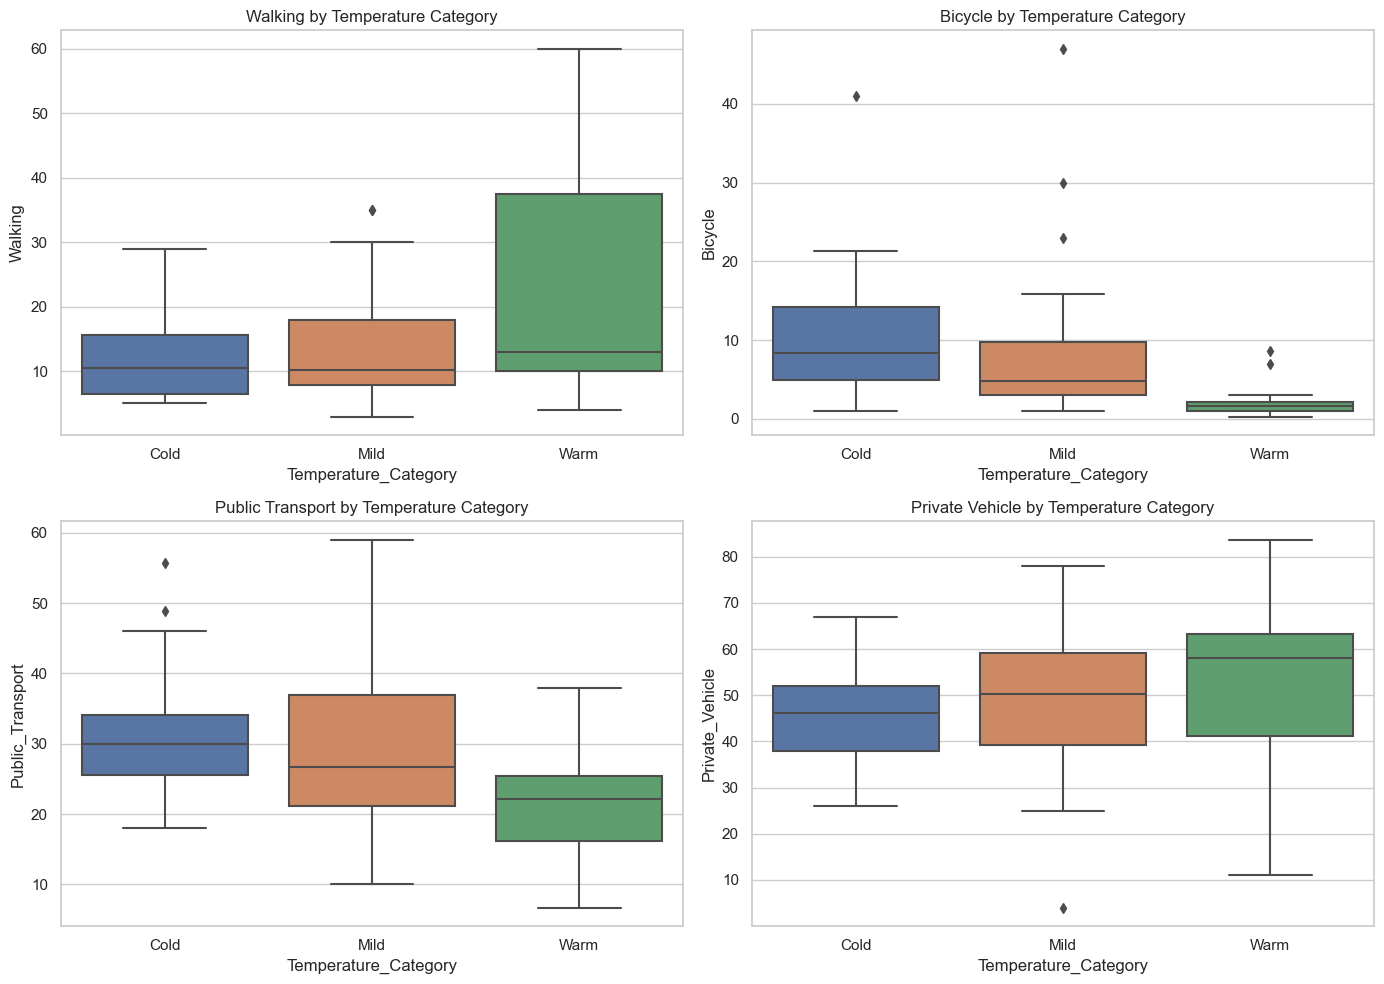

In [27]:
# Define the correct order for the categories
category_order = ['Cold', 'Mild', 'Warm']

# Visualization with seaborn
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='Temperature_Category', y='Walking', data=df_cleaned_temp, ax=axes[0, 0], order=category_order)
sns.boxplot(x='Temperature_Category', y='Bicycle', data=df_cleaned_temp, ax=axes[0, 1], order=category_order)
sns.boxplot(x='Temperature_Category', y='Public_Transport', data=df_cleaned_temp, ax=axes[1, 0], order=category_order)
sns.boxplot(x='Temperature_Category', y='Private_Vehicle', data=df_cleaned_temp, ax=axes[1, 1], order=category_order)
axes[0, 0].set_title('Walking by Temperature Category')
axes[0, 1].set_title('Bicycle by Temperature Category')
axes[1, 0].set_title('Public Transport by Temperature Category')
axes[1, 1].set_title('Private Vehicle by Temperature Category')
plt.tight_layout()
plt.show()

# Rainfall Categories

1) Low Rainfall: 0 - 500 mm
2) Moderate Rainfall: 500 - 750 mm
3) High Rainfall: 750 - 1000  mm
4) Very High Rainfall: > 1000 mm

Πηγή: https://www.researchgate.net/figure/showed-an-estimation-of-annual-rainfall-occurring-in-Europe-Rainiest-areas-more-than_fig1_258333029

In [28]:
# Define categories for the "Rain (litre/m2)" column
bins = [0, 500, 750, 1000, float('inf')]
labels = ['Low Rainfall', 'Moderate Rainfall', 'High Rainfall', 'Very High Rainfall']

# Create a new column with the categories for rainfall
df['Rainfall_Category'] = pd.cut(df['Rain (litre/m2)'], bins=bins, labels=labels, include_lowest=True)

# Check the unique values in the new categorical column
print(df['Rainfall_Category'].unique())

['Moderate Rainfall', 'High Rainfall', 'Low Rainfall', 'Very High Rainfall']
Categories (4, object): ['Low Rainfall' < 'Moderate Rainfall' < 'High Rainfall' < 'Very High Rainfall']


In [29]:
# Count the occurrences of each category in the "Rainfall_Category" column
rainfall_category_counts = df['Rainfall_Category'].value_counts()

# Print the count for each category
print(rainfall_category_counts)

Rainfall_Category
Moderate Rainfall     34
High Rainfall         27
Low Rainfall          10
Very High Rainfall    10
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


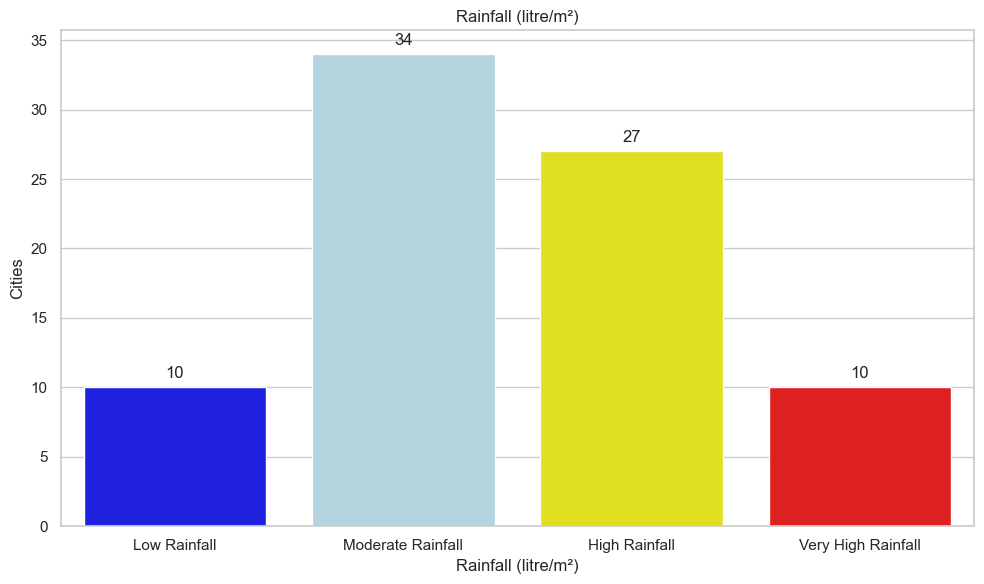

In [30]:
# Plot the countplot with specified colors and annotate counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rainfall_Category', data=df, palette=colors)

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Set labels and title
plt.xlabel('Rainfall (litre/m²)')
plt.ylabel('Cities')
plt.title('Rainfall (litre/m²)')

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
# Perform one-way MANOVA for Rainfall_Category as the independent variable
manova_model_rainfall = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Rainfall_Category', data=df)

# Print the MANOVA results
print(manova_model_rainfall.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0019 4.0000 74.0000 9879.2061 0.0000
         Pillai's trace   0.9981 4.0000 74.0000 9879.2061 0.0000
 Hotelling-Lawley trace 534.0111 4.0000 74.0000 9879.2061 0.0000
    Roy's greatest root 534.0111 4.0000 74.0000 9879.2061 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
     Rainfall_Category    Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.7474 12.0000 196.0771  1.9005 0.0362
           Pillai's trace 0.2601 12.0000 228.

Η τιμή p είναι μικρότερη του 0.05 σε όλα τα τεστ, επομένως υπάρχει στατιστικά σημαντικό εύρημα. Βέβαια, η τιμή p στο Pillai's trace είναι οριακά μικότερη του 0.05 το οποίο σημαίνει πως ενδεχομένως το η σημασία του ευρήματος να είναι πιο ασθενής από άλλες.

In [32]:
# List of dependent variables
dependent_variables = ["Walking", "Bicycle", "Public_Transport", "Private_Vehicle"]

# Perform Tukey HSD test for each dependent variable
for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df[dep_var], groups=df['Rainfall_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2       meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
    High Rainfall       Low Rainfall    12.09 0.0133   1.9163 22.2637   True
    High Rainfall  Moderate Rainfall  -1.5276 0.9418   -8.612  5.5567  False
    High Rainfall Very High Rainfall    4.627 0.6323  -5.5467 14.8007  False
     Low Rainfall  Moderate Rainfall -13.6176 0.0029 -23.5042 -3.7311   True
     Low Rainfall Very High Rainfall   -7.463 0.3878 -19.7536  4.8276  False
Moderate Rainfall Very High Rainfall   6.1546 0.3655  -3.7319 16.0412  False
----------------------------------------------------------------------------


Tukey HSD test results for Bicycle:

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2       meandiff p-adj   lower    upper  reject


Από τα post-hoc tests φαίνεται πως η κατηγορία βροχόπτωσης επηρεάζει μόνο το περπάτημα καθώς όσο αυξάνεται η βροχόπτωση είναι λιγότερο πιθανό οι μετακινούμενοι να περπατήσουν και να εκτεθούν στην βροχή.

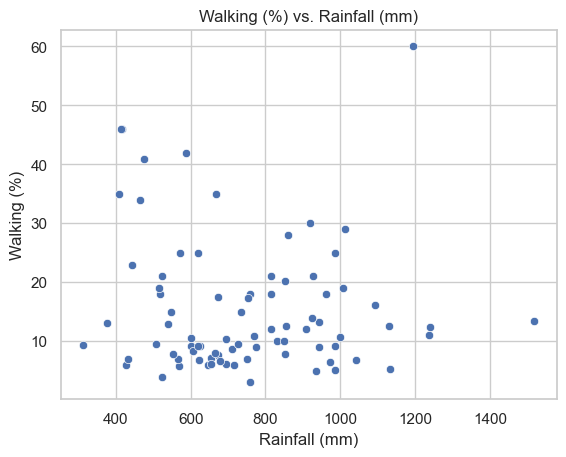

In [135]:
# Create scatterplot for Public Transport (%) modal split percentage
sns.scatterplot(x="Rain (litre/m2)", y="Walking", data=df)
plt.title("Walking (%) vs. Rainfall (mm)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Walking (%)")
plt.show()

# Travel Time per 10km Categories

1) Below 10 min
2) 10 - 20 min
3) 20 - 26 min
4) Above 26 min

Οι κατηγορίες φτιάχτηκαν ακριβώς όπως τις παρουσιάζει το συγκοινωνιακό site "TomTom".
https://www.tomtom.com/traffic-index/ranking/

In [33]:
# Define the bins and labels for the travel time categories
travel_time_bins = [0, 10, 20, 26, np.inf]
travel_time_labels = ['< 10 min', '10 - 20 min', '20 - 26 min', '> 26 min']

# Create a new column with the travel time categories
df['Travel_Time_Category'] = pd.cut(df['Average Travel Time per 10km (min)'], bins=travel_time_bins, labels=travel_time_labels, include_lowest=True)

# Drop rows with NaN values in Travel_Time_Category or dependent variables
df_cleaned_travel_time = df.dropna(subset=['Travel_Time_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_travel_time['Travel_Time_Category'].unique())

# Verify the counts
travel_time_category_counts = df_cleaned_travel_time['Travel_Time_Category'].value_counts()
print(travel_time_category_counts)

['20 - 26 min', '10 - 20 min', '> 26 min', '< 10 min']
Categories (4, object): ['< 10 min' < '10 - 20 min' < '20 - 26 min' < '> 26 min']
Travel_Time_Category
10 - 20 min    53
20 - 26 min    21
> 26 min        5
< 10 min        1
Name: count, dtype: int64


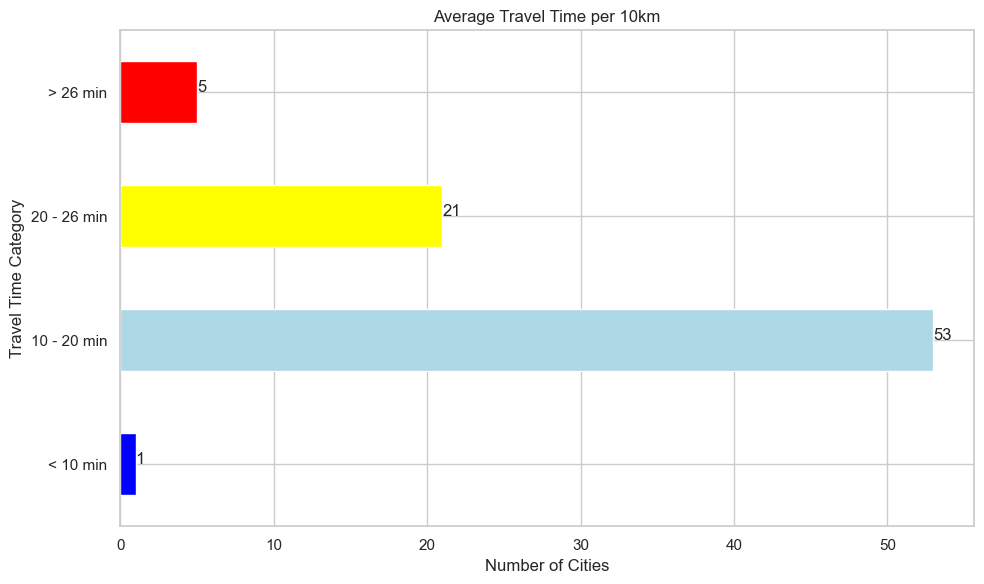

In [34]:
# Count the number of cities in each category
city_counts = df_cleaned_travel_time['Travel_Time_Category'].value_counts().sort_index()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='barh', color=colors)

# Annotate counts on the bars
for index, value in enumerate(city_counts):
    plt.text(value, index, str(value))

# Set labels and title
plt.xlabel('Number of Cities')
plt.ylabel('Travel Time Category')
plt.title('Average Travel Time per 10km')

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# Perform one-way MANOVA for Travel_Time_Category as the independent variable
manova_model_travel_time = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Travel_Time_Category', data=df_cleaned_travel_time)

# Print the MANOVA results
print(manova_model_travel_time.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0188 4.0000 73.0000 954.1306 0.0000
         Pillai's trace  0.9812 4.0000 73.0000 954.1306 0.0000
 Hotelling-Lawley trace 52.2811 4.0000 73.0000 954.1306 0.0000
    Roy's greatest root 52.2811 4.0000 73.0000 954.1306 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
  Travel_Time_Category  Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.5454 12.0000 193.4313  4.1512 0.0000
         Pillai's trace 0.5010 12.0000 225.0000  3.7592 0.0000
 Hotelling-

Τα αποτελέσματα της μονόδρομης MANOVA υποδεικνύουν μια σημαντική συνολική επίδραση της μεταβλητής "Travel_Time_Category" στις εξαρτημένες μεταβλητές ("Walking", "Bicycle", "Public_Transport", "Private_Vehicle"). Αυτό το συμπέρασμα υποστηρίζεται από τις εξαιρετικά χαμηλές τιμές p (< 0,05) για τα Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, and Roy's greatest root.

In [36]:
# Perform post-hoc Tukey HSD tests
for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df_cleaned_travel_time[dep_var], groups=df_cleaned_travel_time['Travel_Time_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
10 - 20 min 20 - 26 min  -0.6805 0.9954  -8.3066  6.9455  False
10 - 20 min    < 10 min  12.7857 0.6753 -17.0674 42.6388  False
10 - 20 min    > 26 min  -0.2543    1.0 -14.0907  13.582  False
20 - 26 min    < 10 min  13.4662 0.6484 -16.8052 43.7376  False
20 - 26 min    > 26 min   0.4262 0.9998 -14.2909 15.1433  False
   < 10 min    > 26 min   -13.04 0.7163 -45.4382 19.3582  False
---------------------------------------------------------------


Tukey HSD test results for Bicycle:

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
10 - 20 min 20 - 26 min   -1.268 0.8994  -6.0738   3.5378  False
10 - 20 min    < 10 min 

Παρατηρείται πως για μικρούς χρόνους διαδρομής αυξάνεται το ποσοστό του ποδηλάτου, ενώ για μεγάλους χρόνους αυξάνονται τα ποσοστά των Μ.Μ.Μ. και της ιδιωτικής μετακίνησης. Αυτό σημαίνει πως στις πόλεις που η μετακίνηση 10 χιλιομέτρων απαιτεί περισσότερο χρόνο, οι μετακινούμενοι είναι πιθανότερο να βρίσκονται σε αυτοκίνητο ή στα μέσα μαζικής μεταφοράς.

In [37]:
# Define the dependent variables and target variable
X = df_cleaned_travel_time[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_travel_time['Travel_Time_Category']

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Get the coefficients of the linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)

# Reindex the DataFrame to ensure rows are in the desired order
ordered_categories = ['< 10 min', '10 - 20 min', '20 - 26 min', '> 26 min']
coefficients = coefficients.reindex(ordered_categories)

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
              Walking   Bicycle  Public_Transport  Private_Vehicle
< 10 min    -0.206337  0.438832         -0.529263        -0.519385
10 - 20 min -0.012738 -0.008867         -0.031779        -0.008415
20 - 26 min  0.036627  0.014311          0.076158         0.040966
> 26 min     0.022460 -0.053880          0.122854         0.021017


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

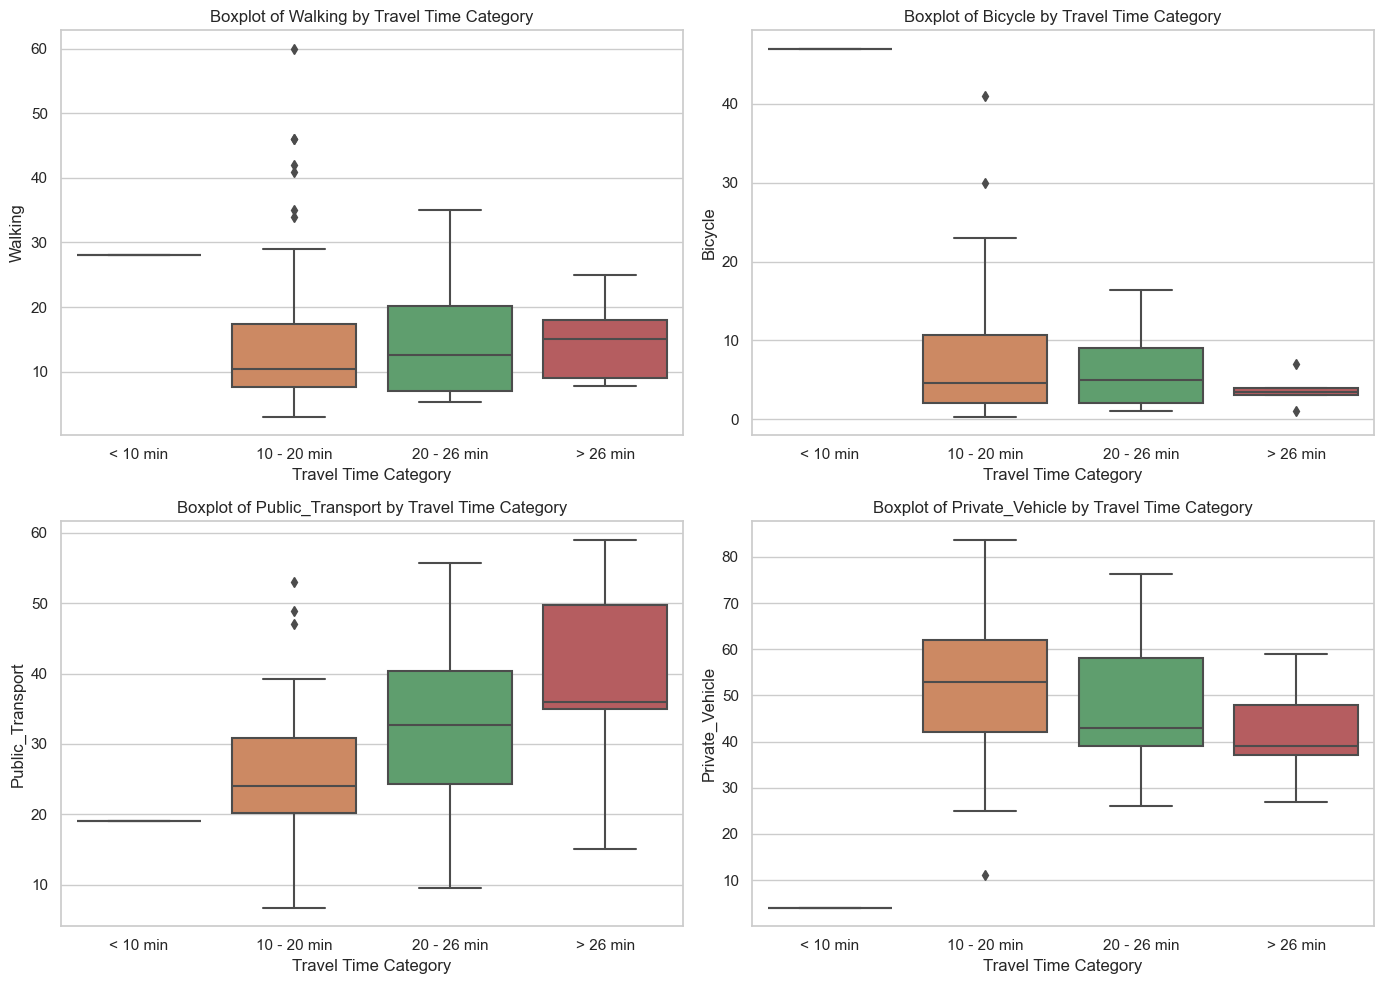

In [38]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the list of dependent variables
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot a boxplot for each dependent variable
for i, dep_var in enumerate(dependent_variables):
    sns.boxplot(x='Travel_Time_Category', y=dep_var, data=df_cleaned_travel_time, ax=axes[i])
    axes[i].set_title(f'Boxplot of {dep_var} by Travel Time Category')
    axes[i].set_xlabel('Travel Time Category')
    axes[i].set_ylabel(dep_var)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Congestion Level Categories

1. Low Congestion: Below 30%
2. Moderate Congestion: 30% - 40%
3. High Congestion: Above 40%

Οι κατηγορίες φτιάχτηκαν ακριβώς όπως τις παρουσιάζει το συγκοινωνιακό site "TomTom".
https://www.tomtom.com/traffic-index/ranking/

In [39]:
# Define the bins and labels for the congestion categories
congestion_bins = [0, 30, 40, 100]
congestion_labels = ['Low Congestion', 'Moderate Congestion', 'High Congestion']

# Create a new column with the congestion categories
df['Congestion_Category'] = pd.cut(df['Congestion Level (%)'], bins=congestion_bins, labels=congestion_labels, include_lowest=True)

# Drop rows with NaN values in Congestion_Category or dependent variables
df_cleaned_congestion = df.dropna(subset=['Congestion_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_congestion['Congestion_Category'].unique())

# Verify the counts
congestion_category_counts = df_cleaned_congestion['Congestion_Category'].value_counts()
print(congestion_category_counts)

['Moderate Congestion', 'Low Congestion', 'High Congestion']
Categories (3, object): ['Low Congestion' < 'Moderate Congestion' < 'High Congestion']
Congestion_Category
Moderate Congestion    39
Low Congestion         26
High Congestion        15
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


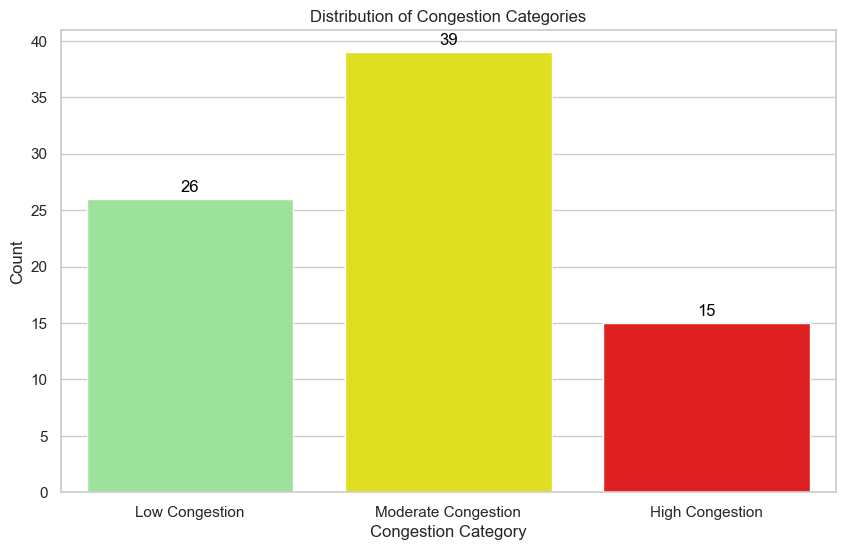

In [40]:
# Define the color palette in the desired order
colors = ['lightgreen', 'yellow', 'red']

# Create a count plot for the Congestion_Category
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned_congestion, x='Congestion_Category', palette=colors)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Congestion Categories')
plt.xlabel('Congestion Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [41]:
# Perform MANOVA
manova_model_fuel_cost = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Congestion_Category', data=df_cleaned_congestion)
manova_results_fuel_cost = manova_model_fuel_cost.mv_test()

# Print the MANOVA results
print(manova_results_fuel_cost)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0007 4.0000 74.0000 27926.0576 0.0000
         Pillai's trace    0.9993 4.0000 74.0000 27926.0576 0.0000
 Hotelling-Lawley trace 1509.5166 4.0000 74.0000 27926.0576 0.0000
    Roy's greatest root 1509.5166 4.0000 74.0000 27926.0576 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
   Congestion_Category    Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.7580  8.0000  148.0000   2.7486  0.0074
          Pi

Όλα τα στατιστικά στοιχεία της δοκιμής είναι σημαντικά (p < 0,05), υποδεικνύοντας ότι υπάρχουν σημαντικές διαφορές σε τουλάχιστον μία από τις μεταβλητές του τρόπου μεταφοράς στις διάφορες κατηγορίες συμφόρησης.

In [42]:
# Dependent variables
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Perform Tukey HSD post-hoc tests for each dependent variable
for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df_cleaned_congestion[dep_var], groups=df_cleaned_congestion['Congestion_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
High Congestion      Low Congestion   3.7111 0.5567  -4.8516 12.2737  False
High Congestion Moderate Congestion  -1.3507 0.9148  -9.3743  6.6729  False
 Low Congestion Moderate Congestion  -5.0618 0.1734 -11.7481  1.6245  False
---------------------------------------------------------------------------


Tukey HSD test results for Bicycle:

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
High Congestion      Low Congestion   5.2913 0.1204  -1.049 11.6315  False
High Congestion Moderate Congestion   5.2637  0.093 -0.6774 11.2048  False
 Low Congestion M

Παρατηρείται πως στατιστικά σημαντική διαφορά στην αλλαγή της συμφόρησης έχει μόνο η κατηγορία των μέσων μαζικής μεταφοράς.

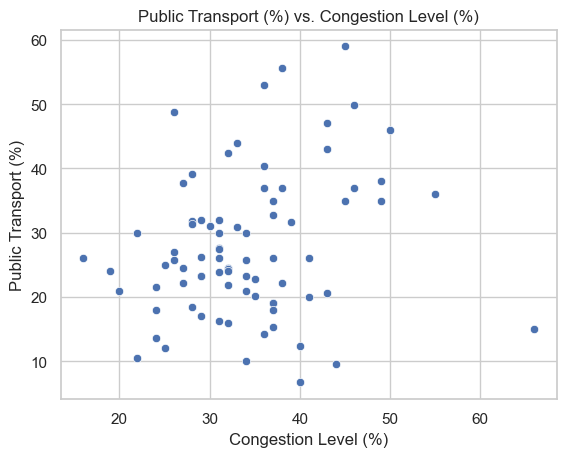

In [43]:
# Create scatterplot for Public Transport (%) modal split percentage
sns.scatterplot(x="Congestion Level (%)", y="Public_Transport", data=df_cleaned_congestion)
plt.title("Public Transport (%) vs. Congestion Level (%)")
plt.xlabel("Congestion Level (%)")
plt.ylabel("Public Transport (%)")
plt.show()

Υπάρχει σχετικά γραμμική σχέση μεταξύ των δύο μεγεθών, γεγονός που υποδηλώνει πως όσο αυξάνεται η συμφόρηση των δρόμων στον αστικό ιστό, τόσο οι μετακινούμενοι προτιμούν την μετακίνηση με τα μέσα μαζικής μεταφοράς. Το γεγονός αυτό είναι λογικό, καθώς τα μέσα καθορισμένης πορείας (τραμ και μετρό) είναι εκτός της κυκλοφορίας και πολλές πόλεις έχουν αποκλειστικές λωρίδες κυκλοφορίας για τα λεωφορεία.

# Average Speed in rush hour Categories



In [44]:
df[["Average speed in rush hour (km/h)"]].describe().round(2)

,Average speed in rush hour (km/h)
count,80.00
mean,29.41
std,7.56
min,14.00
25%,24.00
50%,29.00
75%,33.25
max,56.00


In [45]:
# Define the bins and corresponding labels
bins = [0, 20, 25, 30, float('inf')]
labels = ['Slow', 'Moderate', 'Fast', 'Very Fast']

# Create the new categorical column
df['Speed_Category'] = pd.cut(df['Average speed in rush hour (km/h)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_speed = df.dropna(subset=['Speed_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_speed['Speed_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_speed['Speed_Category'].value_counts()
print(category_counts)

['Moderate', 'Very Fast', 'Fast', 'Slow']
Categories (4, object): ['Slow' < 'Moderate' < 'Fast' < 'Very Fast']
Speed_Category
Very Fast    38
Moderate     19
Fast         18
Slow          5
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


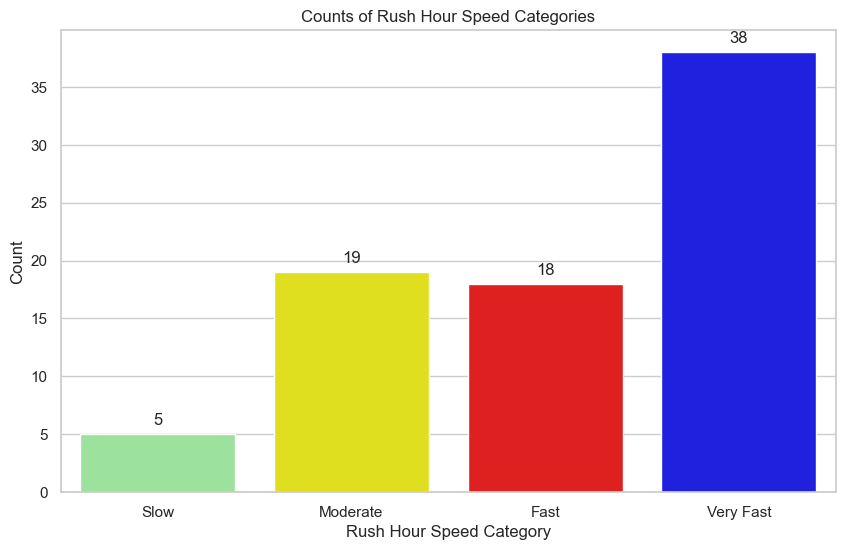

In [46]:
# Create a bar chart for the "Rush_Hour_Speed_Category"
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=df_cleaned_speed, x='Speed_Category', palette=['lightgreen', 'yellow', 'red', 'blue'])

# Add count labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

# Set the title and labels
plt.title('Counts of Rush Hour Speed Categories')
plt.xlabel('Rush Hour Speed Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [47]:
# Perform MANOVA
manova_model_speed = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Speed_Category', data=df_cleaned_speed)
manova_results_speed = manova_model_speed.mv_test()

# Print the MANOVA results
print(manova_results_speed)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0038 4.0000 73.0000 4840.1223 0.0000
         Pillai's trace   0.9962 4.0000 73.0000 4840.1223 0.0000
 Hotelling-Lawley trace 265.2122 4.0000 73.0000 4840.1223 0.0000
    Roy's greatest root 265.2122 4.0000 73.0000 4840.1223 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       Speed_Category     Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.7242 12.0000 193.4313  2.0909 0.0192
           Pillai's trace 0.2922 12.0000 225.

In [48]:
# Perform Tukey's HSD test for each dependent variable
dependent_vars = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_cleaned_speed[var], groups=df_cleaned_speed['Speed_Category'], alpha=0.05)
    print(f"Tukey's HSD test for {var}:\n")
    print(tukey)
    print("\n")

Tukey's HSD test for Walking:

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
    Fast  Moderate   0.6271 0.9983  -9.1856 10.4399  False
    Fast      Slow   0.1856    1.0  -14.896 15.2671  False
    Fast Very Fast    0.515 0.9986  -8.0213  9.0513  False
Moderate      Slow  -0.4416 0.9998 -15.4366 14.5534  False
Moderate Very Fast  -0.1121    1.0  -8.4946  8.2704  False
    Slow Very Fast   0.3295 0.9999 -13.8631  14.522  False
----------------------------------------------------------


Tukey's HSD test for Bicycle:

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
    Fast  Moderate   0.3448 0.9992  -6.6145  7.3041  False
    Fast      Slow  -1.1883 0.9913 -11.8843  9.5076  False
    Fast Very Fast   5.2851 0.1087  -0.7689 11.3391

Φαίνεται πως όσο αυξάνεται η ταχύτητα στους δρόμους κατά τις ώρες αιχμής τόσο μειώνεται η χρήση των Μ.Μ.Μ. προφανώς γιατί η χρήση του αυτοκινήτου φαντάζει πιο ελκυστική.

In [49]:
# Define independent variables (Speed_Category) and dependent variables
X_lda = df_cleaned_speed[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y_lda = df_cleaned_speed['Speed_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X_lda, y_lda)

# Get coefficients of linear discriminants
coefficients_lda = pd.DataFrame(lda.coef_, columns=X_lda.columns, index=lda.classes_)

print("Coefficients of linear discriminants:")
print(coefficients_lda)

Coefficients of linear discriminants:
            Walking   Bicycle  Public_Transport  Private_Vehicle
Fast      -0.107287 -0.134985         -0.127208        -0.088457
Moderate   0.046880  0.008276          0.095184         0.038026
Slow       0.018935 -0.046286          0.115495         0.006019
Very Fast  0.024888  0.065893         -0.002532         0.022096


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


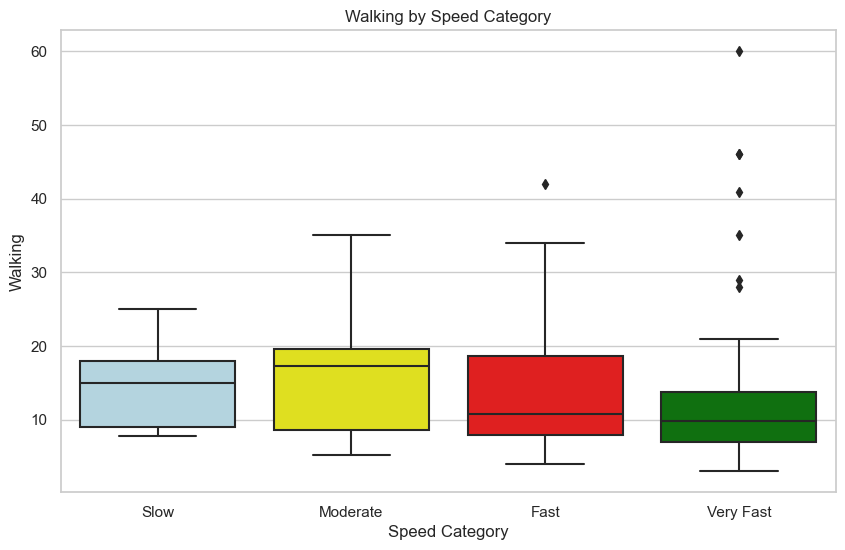

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


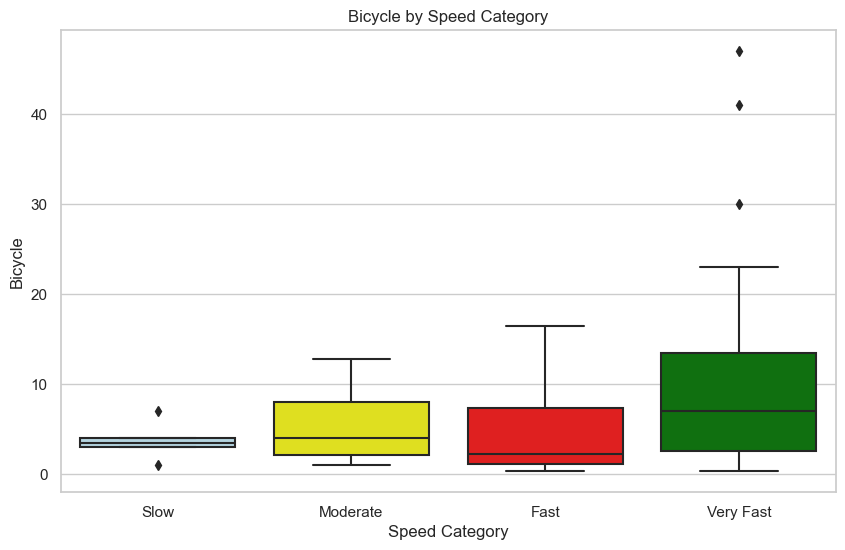

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


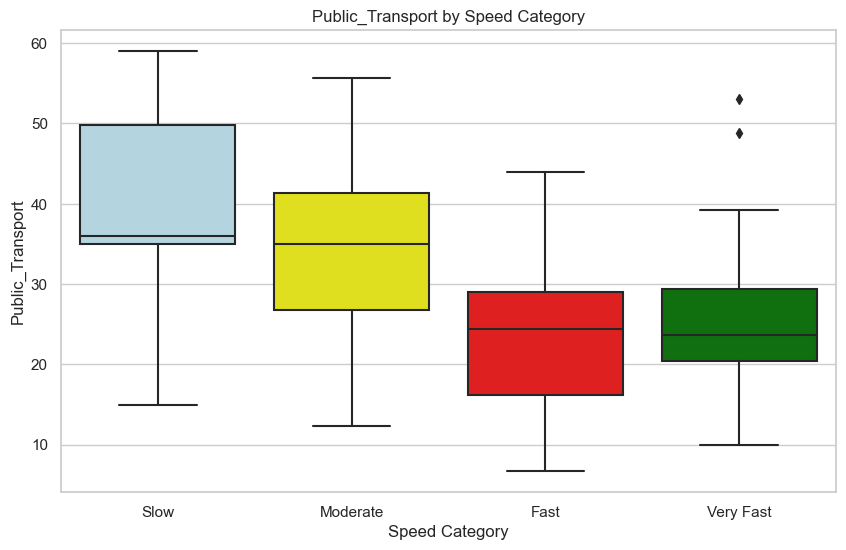

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


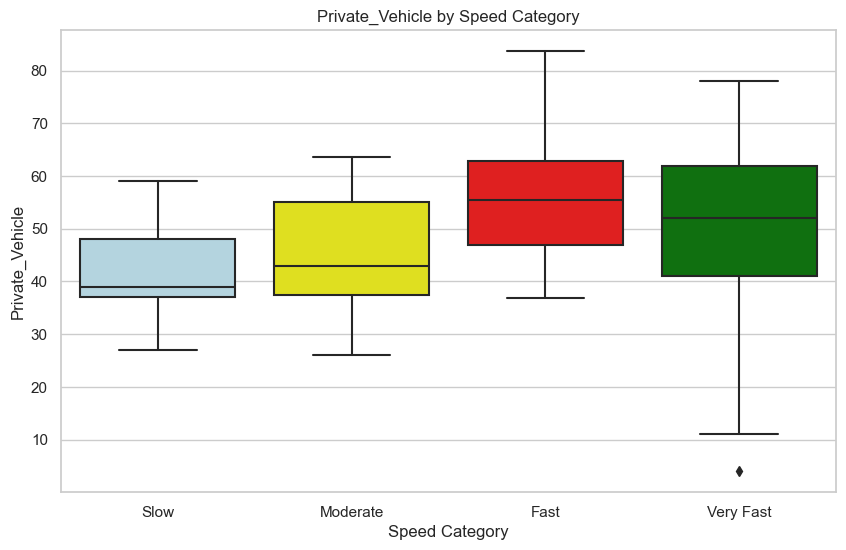

In [50]:
# Define the order of categories
order = ['Slow', 'Moderate', 'Fast', 'Very Fast']

# Plotting boxplots for each dependent variable
for var in dependent_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Speed_Category', y=var, data=df_cleaned_speed, order=order, palette=['lightblue', 'yellow', 'red', 'green'])
    plt.title(f'{var} by Speed Category')
    plt.xlabel('Speed Category')
    plt.ylabel(var)
    plt.show()

# Fuel Cost in rush hour Categories

1. Low Cost: €0 - €600
2. Moderate Cost: €600 - €700
3. High Cost: €700 - €800
3. Very High Cost: €800 and above

In [51]:
# Define the bins and labels for the fuel cost categories
fuel_cost_bins = [0, 600, 700, 800, np.inf]
fuel_cost_labels = ['Low Cost', 'Moderate Cost', 'High Cost', 'Very High Cost']

# Create a new column with the fuel cost categories
df['Fuel_Cost_Category'] = pd.cut(df['Fuel Cost in rush hour per 10km per year (€)'], bins=fuel_cost_bins, labels=fuel_cost_labels, include_lowest=True)

# Drop rows with NaN values in Fuel_Cost_Category or dependent variables
df_cleaned_fuel_cost = df.dropna(subset=['Fuel_Cost_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_fuel_cost['Fuel_Cost_Category'].unique())

# Verify the counts
fuel_cost_category_counts = df_cleaned_fuel_cost['Fuel_Cost_Category'].value_counts()
print(fuel_cost_category_counts)

['High Cost', 'Low Cost', 'Moderate Cost', 'Very High Cost']
Categories (4, object): ['Low Cost' < 'Moderate Cost' < 'High Cost' < 'Very High Cost']
Fuel_Cost_Category
Moderate Cost     36
High Cost         32
Low Cost           7
Very High Cost     5
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


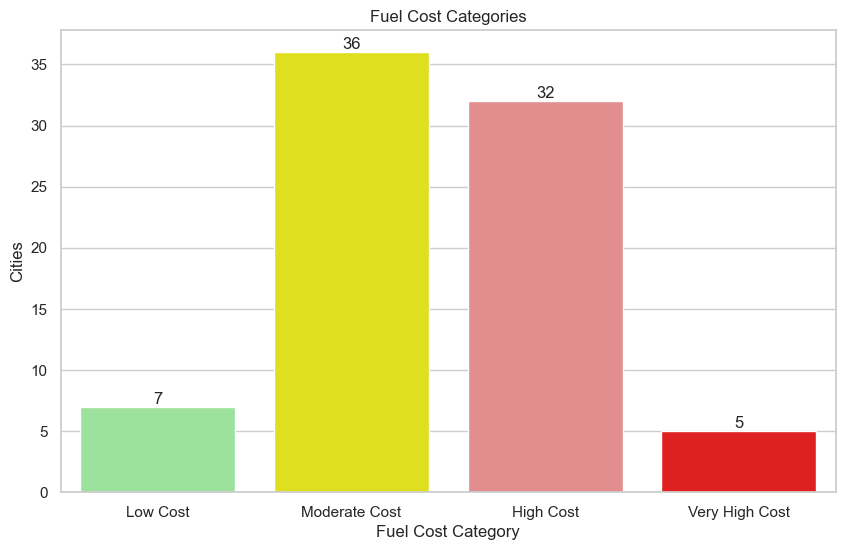

In [52]:
# Count the occurrences of each category in the "Fuel_Cost_Category" column
category_counts = df_cleaned_fuel_cost['Fuel_Cost_Category'].value_counts().sort_index()

# Create the bar chart with specified colors
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values, palette=['lightgreen', 'yellow', 'lightcoral', 'red'])
plt.title('Fuel Cost Categories')
plt.xlabel('Fuel Cost Category')
plt.ylabel('Cities')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Add counts above the bars
for index, value in enumerate(category_counts.values):
    barplot.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.show()

In [53]:
# Perform MANOVA
manova_model_fuel_cost = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Fuel_Cost_Category', data=df_cleaned_fuel_cost)
manova_results_fuel_cost = manova_model_fuel_cost.mv_test()

# Print the MANOVA results
print(manova_results_fuel_cost)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0024 4.0000 73.0000 7568.7228 0.0000
         Pillai's trace   0.9976 4.0000 73.0000 7568.7228 0.0000
 Hotelling-Lawley trace 414.7245 4.0000 73.0000 7568.7228 0.0000
    Roy's greatest root 414.7245 4.0000 73.0000 7568.7228 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
     Fuel_Cost_Category   Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.6761 12.0000 193.4313  2.5696 0.0035
           Pillai's trace 0.3501 12.0000 225.

Τα αποτελέσματα υποδεικνύουν ότι υπάρχει σημαντική επίδραση της Κατηγορίας Κόστους Καυσίμου στις συνδυασμένες εξαρτημένες μεταβλητές (περπάτημα, ποδήλατο, δημόσια συγκοινωνία και ιδιωτικό όχημα), όπως αποδεικνύεται από τις χαμηλές τιμές p (p < 0,05) στις δοκιμές MANOVA.

In [54]:
# List of dependent variables
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Perform Tukey HSD tests for each dependent variable
for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    tukey = pairwise_tukeyhsd(endog=df_cleaned_fuel_cost[dep_var], groups=df_cleaned_fuel_cost['Fuel_Cost_Category'], alpha=0.05)
    print(tukey)
    print('\n')

Tukey HSD test results for Walking:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
    High Cost       Low Cost   1.9402 0.9763 -10.4335  14.314  False
    High Cost  Moderate Cost    2.637 0.7716  -4.5677  9.8418  False
    High Cost Very High Cost   0.7859 0.9989 -13.4745 15.0464  False
     Low Cost  Moderate Cost   0.6968 0.9988 -11.5529 12.9466  False
     Low Cost Very High Cost  -1.1543 0.9981 -18.5183 16.2097  False
Moderate Cost Very High Cost  -1.8511 0.9859 -16.0041 12.3019  False
--------------------------------------------------------------------


Tukey HSD test results for Bicycle:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
    High Cost       Low Cos

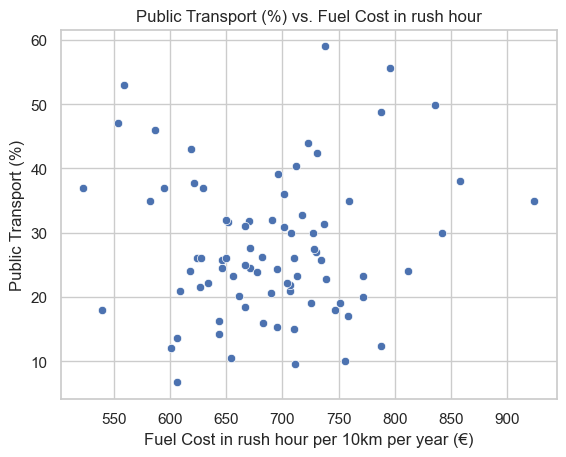

In [55]:
# Create scatterplot for Public Transport (%) modal split percentage
sns.scatterplot(x="Fuel Cost in rush hour per 10km per year (€)", y="Public_Transport", data=df_cleaned_fuel_cost)
plt.title("Public Transport (%) vs. Fuel Cost in rush hour")
plt.xlabel("Fuel Cost in rush hour per 10km per year (€)")
plt.ylabel("Public Transport (%)")
plt.show()

Παρόλο που το αρχικό test one-way MANOVA έδειξε στατιστικά σημαντική επίδραση, μετέπειτα παρατειρείται πως η το κόστος βενζίνης που δαπανάται ετησίως στην κίνηση δεν έχει σοβαρή επίδραση στον τρόπο επιλογής μετακίνησης. Αυτό μπορεί να εξηγηθεί καθώς το κόστος βενζίνης αφορά μόνο τους οδηγούς ιδιωτικών οχημάτων και όχι το σύνολο των μετακινούμενων σε μία πόλη.

# Average Journey Time Categories

1. Below 25 min
2. 25 - 30 min
3. 30 - 35 min
4. Above 35 min

Σε παρόμοιο μοτίβο με κατηγοριοποίηση της Eurostat: https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Employed_persons_by_commuting_time_and_country,_2019_(%25).png

In [56]:
df[["Average Time of Journey (min)"]].describe().round(2)

,Average Time of Journey (min)
count,78.00
mean,30.83
std,5.38
min,21.36
25%,26.92
50%,30.25
75%,34.95
max,44.74


In [57]:
# Define the bins and corresponding labels
bins = [0, 25, 30, 35, float('inf')]
labels = ['Below 25 min', '25 - 30 min', '30 - 35 min', 'Above 35 min']

# Create the new categorical column
df['Journey_Time_Category'] = pd.cut(df['Average Time of Journey (min)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_journey_time = df.dropna(subset=['Journey_Time_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_journey_time['Journey_Time_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_journey_time['Journey_Time_Category'].value_counts()
print(category_counts)

['Below 25 min', 'Above 35 min', '30 - 35 min', '25 - 30 min']
Categories (4, object): ['Below 25 min' < '25 - 30 min' < '30 - 35 min' < 'Above 35 min']
Journey_Time_Category
25 - 30 min     25
30 - 35 min     23
Above 35 min    20
Below 25 min    10
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


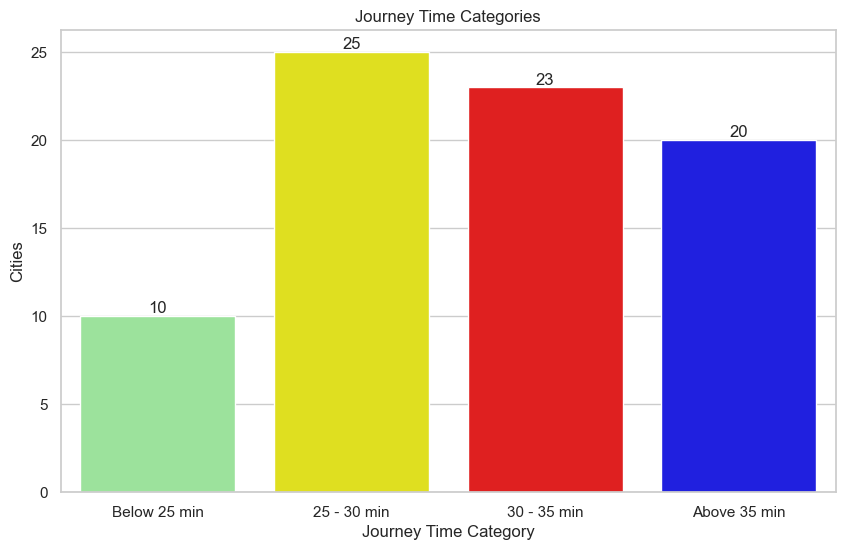

In [58]:
# Count the occurrences of each category in the "Journey_Time_Category" column
category_counts = df_cleaned_journey_time['Journey_Time_Category'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values, palette=['lightgreen', 'yellow', 'red', 'blue'])
plt.title('Journey Time Categories')
plt.xlabel('Journey Time Category')
plt.ylabel('Cities')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Add counts above the bars
for index, value in enumerate(category_counts.values):
    barplot.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.show()

In [59]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Journey_Time_Category', data=df_cleaned_journey_time)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0019 4.0000 71.0000 9400.9443 0.0000
         Pillai's trace   0.9981 4.0000 71.0000 9400.9443 0.0000
 Hotelling-Lawley trace 529.6307 4.0000 71.0000 9400.9443 0.0000
    Roy's greatest root 529.6307 4.0000 71.0000 9400.9443 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
   Journey_Time_Category  Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.6105 12.0000 188.1398  3.2148 0.0003
           Pillai's trace 0.4213 12.0000 219.

Τα αποτελέσματα της μονόδρομης MANOVA δείχνουν ότι υπάρχουν σημαντικές διαφορές μεταξύ των κατηγοριών χρόνου ταξιδιού για τις εξαρτημένες μεταβλητές (Περπάτημα, Ποδήλατο, Δημόσια Μεταφορά, Ιδιωτικό Όχημα).

In [60]:
# Define the dependent variables
dependent_vars = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Perform Tukey's HSD test for each dependent variable
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_cleaned_journey_time[var], groups=df_cleaned_journey_time['Journey_Time_Category'], alpha=0.05)
    print(f"Tukey HSD test results for {var}:\n")
    print(tukey.summary())
    print("\n")

Tukey HSD test results for Walking:

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
 25 - 30 min  30 - 35 min   4.4302 0.5114  -3.9653 12.8257  False
 25 - 30 min Above 35 min   0.0636    1.0  -8.6537  8.7809  False
 25 - 30 min Below 25 min   9.6876 0.0979  -1.1848   20.56  False
 30 - 35 min Above 35 min  -4.3666  0.571 -13.2507  4.5175  False
 30 - 35 min Below 25 min   5.2574 0.5939  -5.7492  16.264  False
Above 35 min Below 25 min    9.624 0.1201    -1.63  20.878  False
-----------------------------------------------------------------


Tukey HSD test results for Bicycle:

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
 25 - 30 min  30 - 35 min  -6.3148 0.0343 -12.2906  -0.339   True


Παρατηρείται πως όταν αυξάνεται ο χρόνος ταξιδιού, τότε η πιθανότητα ο μετακινούμενος να πάει με το ποδήλατο μειώνεται ενώ η πιθανότητα να χρησιμοποιήσει τα μέσα μαζικής μεταφοράς αυξάνεται.

In [61]:
# Define independent variable (Journey_Time_Category) and dependent variables
X = df_cleaned_journey_time[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_journey_time['Journey_Time_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Below 25 min', '25 - 30 min', '30 - 35 min', 'Above 35 min']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
               Walking   Bicycle  Public_Transport  Private_Vehicle
Below 25 min  0.068059  0.108076         -0.072905        -0.003903
25 - 30 min   0.024081  0.090697          0.002757         0.039712
30 - 35 min   0.028172 -0.025551          0.029109         0.021300
Above 35 min -0.096529 -0.138026         -0.000470        -0.072183


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

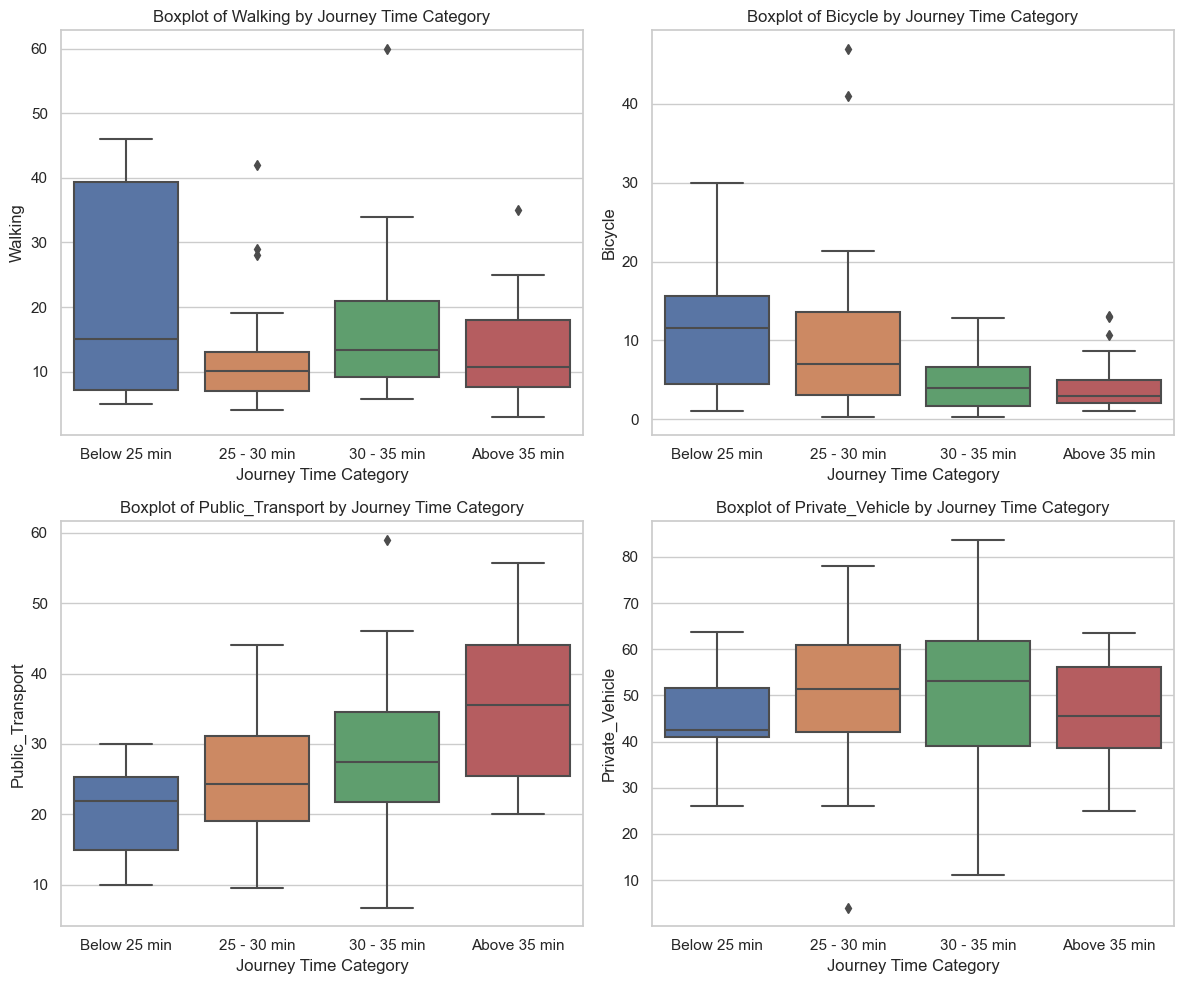

In [62]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a boxplot for each dependent variable
for i, var in enumerate(dependent_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Journey_Time_Category', y=var, data=df_cleaned_journey_time)
    plt.title(f'Boxplot of {var} by Journey Time Category')
    plt.xlabel('Journey Time Category')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Average Journey Length Categories

1. Small trip: Below 10 km
2. Medium trip: 10 - 15 km
3. Big trip: 15 - 20 km
4. Very big trip: Above 20 km

In [63]:
df[["Average Length of Journey (km)"]].describe().round(2)

,Average Length of Journey (km)
count,81.00
mean,12.33
std,4.96
min,4.11
25%,9.40
50%,11.50
75%,14.20
max,27.00


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


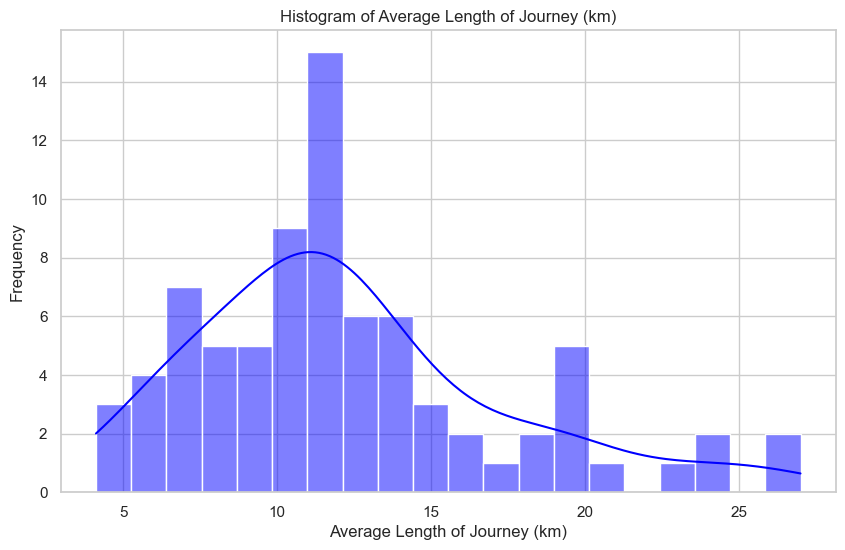

In [64]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Average Length of Journey (km)'], bins=20, kde=True, color='blue')

# Add titles and labels
plt.title('Histogram of Average Length of Journey (km)')
plt.xlabel('Average Length of Journey (km)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [65]:
# Define the bins and corresponding labels
bins = [0, 10, 15, 20, float('inf')]
labels = ['Small trip', 'Medium trip', 'Big trip', 'Very big trip']

# Create the new categorical column
df['Journey_Length_Category'] = pd.cut(df['Average Length of Journey (km)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_journey_length = df.dropna(subset=['Journey_Length_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_journey_length['Journey_Length_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_journey_length['Journey_Length_Category'].value_counts()
print(category_counts)

['Small trip', 'Very big trip', 'Medium trip', 'Big trip']
Categories (4, object): ['Small trip' < 'Medium trip' < 'Big trip' < 'Very big trip']
Journey_Length_Category
Medium trip      39
Small trip       25
Big trip         10
Very big trip     7
Name: count, dtype: int64


In [66]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Journey_Length_Category', data=df_cleaned_journey_length)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0007 4.0000 74.0000 25740.3460 0.0000
         Pillai's trace    0.9993 4.0000 74.0000 25740.3460 0.0000
 Hotelling-Lawley trace 1391.3701 4.0000 74.0000 25740.3460 0.0000
    Roy's greatest root 1391.3701 4.0000 74.0000 25740.3460 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
    Journey_Length_Category Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.6947 12.0000 196.0771  2.4115 0.0062
             Pil

Όλοι οι δείκτες του one-way MANOVA δείχνουν πως υπάρχουν στατιστικά σημαντικά ευρήματα.

In [67]:
# Define the dependent variables
dependent_vars = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Perform Tukey's HSD test for each dependent variable
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_cleaned_journey_length[var], groups=df_cleaned_journey_length['Journey_Length_Category'], alpha=0.05)
    print(f"Tukey HSD test results for {var}:\n")
    print(tukey.summary())
    print("\n")

Tukey HSD test results for Walking:

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
   Big trip   Medium trip   3.1547 0.8366  -6.7419 13.0513  False
   Big trip    Small trip  10.3228  0.054   -0.124 20.7696  False
   Big trip Very big trip  -0.8606 0.9984 -14.6198 12.8987  False
Medium trip    Small trip   7.1681 0.0493   0.0148 14.3215   True
Medium trip Very big trip  -4.0152 0.7942 -15.4761  7.4456  False
 Small trip Very big trip -11.1834 0.0746 -23.1226  0.7558  False
-----------------------------------------------------------------


Tukey HSD test results for Bicycle:

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
   Big trip   Medium trip  -2.8204 0.7415 -10.1215  4.4808  False


In [68]:
# Define independent variable (Journey_Length_Category) and dependent variables
X = df_cleaned_journey_length[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_journey_length['Journey_Length_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Small trip', 'Medium trip', 'Big trip', 'Very big trip']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                Walking   Bicycle  Public_Transport  Private_Vehicle
Small trip    -0.091315 -0.207116         -0.162469        -0.132125
Medium trip    0.106514  0.147924          0.131013         0.115514
Big trip       0.126068  0.235051          0.173220         0.159969
Very big trip -0.447403 -0.420233         -0.397144        -0.400231


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

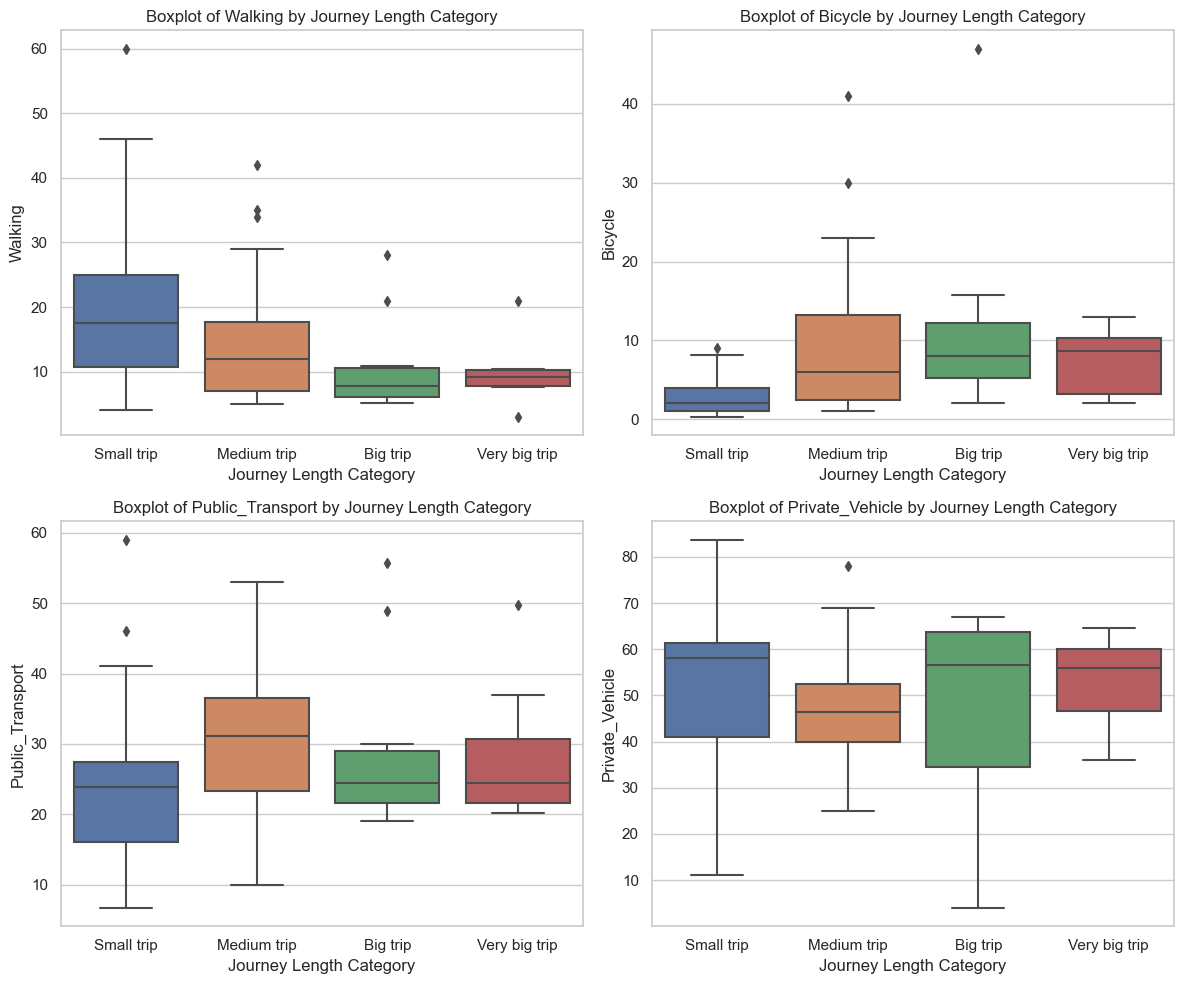

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a boxplot for each dependent variable
for i, var in enumerate(dependent_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Journey_Length_Category', y=var, data=df_cleaned_journey_length)
    plt.title(f'Boxplot of {var} by Journey Length Category')
    plt.xlabel('Journey Length Category')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Bicycle Network Categories

1. Very Short Length: Below 50 km
2. Short Length: 50 - 100 km
3. Moderate Length: 100 - 200 km
4. Long Length: 200 - 300 km
5. Very Long Length: Above 300 km

In [70]:
df[["Bicycle Lanes Length (km)"]].describe().round(2)

,Bicycle Lanes Length (km)
count,76.00
mean,480.09
std,738.05
min,8.00
25%,99.25
50%,241.25
75%,553.45
max,5196.00


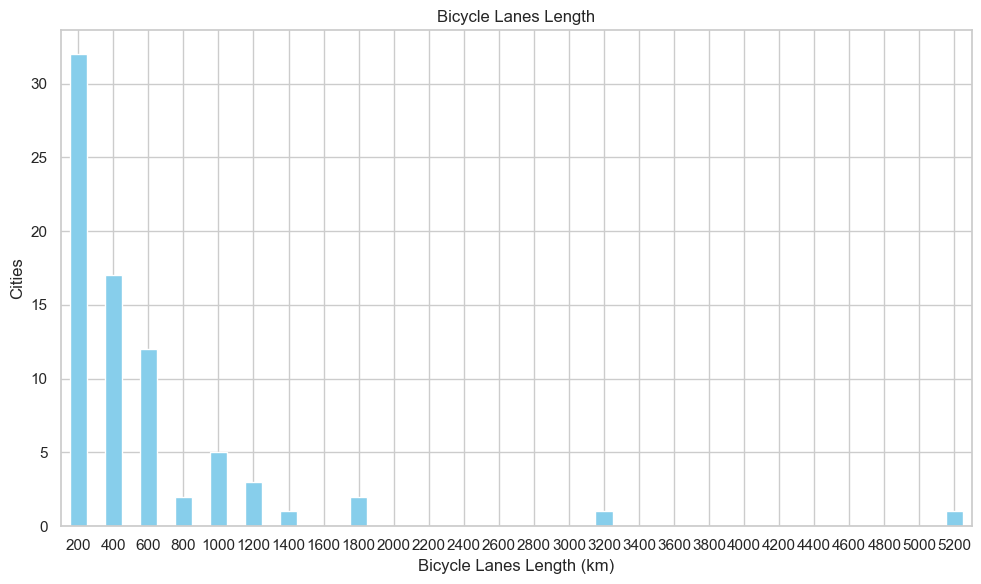

In [71]:
# Define the bin size
bin_size = 200

# Calculate the number of bins based on the maximum value in the column
max_value = df['Bicycle Lanes Length (km)'].max()
num_bins = int(np.ceil(max_value / bin_size))

# Define the bins
bins = [i * bin_size for i in range(num_bins + 1)]

# Create a new column to categorize the bicycle lanes length
df['Bicycle Lanes Category'] = pd.cut(df['Bicycle Lanes Length (km)'], bins=bins)

# Count the number of cities in each category
city_counts = df['Bicycle Lanes Category'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Bicycle Lanes Length (km)')
plt.ylabel('Cities')
plt.title('Bicycle Lanes Length')

# Customize x-axis labels to display the maximum value of each category
plt.xticks(range(len(city_counts)), [str(int(category.right)) for category in city_counts.index])

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
# Define the bins and corresponding labels
bins = [0, 50, 100, 200, 300, float('inf')]
labels = ['Very Short Length', 'Short Length', 'Moderate Length', 'Long Length', 'Very Long Length']

# Create the new categorical column
df['Bicycle_Lanes_Length_Category'] = pd.cut(df['Bicycle Lanes Length (km)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_bicycle_lanes = df.dropna(subset=['Bicycle_Lanes_Length_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_bicycle_lanes['Bicycle_Lanes_Length_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_bicycle_lanes['Bicycle_Lanes_Length_Category'].value_counts()
print(category_counts)

['Very Long Length', 'Short Length', 'Long Length', 'Moderate Length', 'Very Short Length']
Categories (5, object): ['Very Short Length' < 'Short Length' < 'Moderate Length' < 'Long Length' < 'Very Long Length']
Bicycle_Lanes_Length_Category
Very Long Length     32
Long Length          13
Moderate Length      12
Short Length         10
Very Short Length     9
Name: count, dtype: int64


In [73]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Bicycle_Lanes_Length_Category', data=df_cleaned_bicycle_lanes)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                      Multivariate linear model
                                                                     
----------------------------------------------------------------------
        Intercept          Value    Num DF   Den DF   F Value   Pr > F
----------------------------------------------------------------------
           Wilks' lambda    0.0020  4.0000  68.0000  8494.9206  0.0000
          Pillai's trace    0.9980  4.0000  68.0000  8494.9206  0.0000
  Hotelling-Lawley trace  499.7012  4.0000  68.0000  8494.9206  0.0000
     Roy's greatest root  499.7012  4.0000  68.0000  8494.9206  0.0000
---------------------------------------------------------------------
                                                                     
---------------------------------------------------------------------
 Bicycle_Lanes_Length_Category Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------------
                 Wilks' lambda 0.54

In [74]:
# Define the dependent variables
dependent_vars = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

# Perform Tukey's HSD test for each dependent variable
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_cleaned_bicycle_lanes[var], groups=df_cleaned_bicycle_lanes['Bicycle_Lanes_Length_Category'], alpha=0.05)
    print(f"Tukey HSD test results for {var}:\n")
    print(tukey.summary())
    print("\n")

Tukey HSD test results for Walking:

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2      meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------------
     Long Length   Moderate Length  -6.5498 0.6043 -19.2819  6.1823  False
     Long Length      Short Length  -4.3503 0.8921 -17.7281  9.0275  False
     Long Length  Very Long Length  -9.0267 0.1231 -19.4872  1.4338  False
     Long Length Very Short Length  -5.6434 0.7818 -19.4349  8.1481  False
 Moderate Length      Short Length   2.1995 0.9912 -11.4185 15.8175  False
 Moderate Length  Very Long Length  -2.4769 0.9672 -13.2429  8.2891  False
 Moderate Length Very Short Length   0.9064 0.9998 -13.1182  14.931  False
    Short Length  Very Long Length  -4.6764 0.7869 -16.1988   6.846  False
    Short Length Very Short Length  -1.2931 0.9991 -15.9064 13.3202  False
Very Long Length Very Short Length   3.3833  0.933  -8.6169 15.

Όπως φαίνεται από τα post-hoc tests, το μήκος των ποδηλατοδρόμων παίζει καθοριστικό ρόλο για την επιλογή του συγκεκριμένου μέσου, καθώς όσο αυξάνεται το μήκος τους τόσο αυξάνεται και η προτίμηση του ποδηλάτου.

In [75]:
# Define independent variable and dependent variables
X = df_cleaned_bicycle_lanes[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_bicycle_lanes['Bicycle_Lanes_Length_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Very Short Length', 'Short Length', 'Moderate Length', 'Long Length', 'Very Long Length']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                    Walking   Bicycle  Public_Transport  Private_Vehicle
Very Short Length -0.346637 -0.468793         -0.403751        -0.320656
Short Length      -0.134433 -0.211517         -0.150596        -0.139386
Moderate Length    0.240876  0.188791          0.226853         0.257939
Long Length        0.118903  0.028923          0.091395         0.072091
Very Long Length   0.000869  0.115400          0.038417         0.007729


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


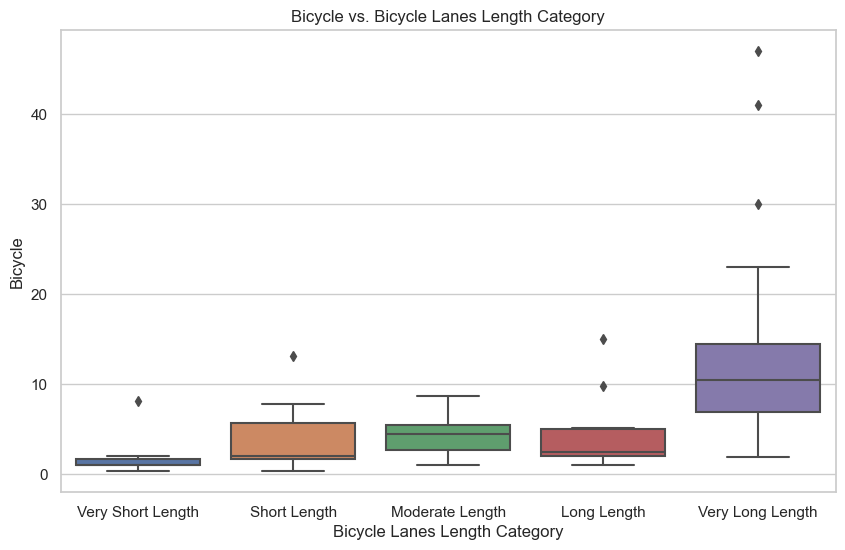

In [76]:
# Visualize boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bicycle_Lanes_Length_Category', y='Bicycle', data=df_cleaned_bicycle_lanes)
plt.title('Bicycle vs. Bicycle Lanes Length Category')
plt.xlabel('Bicycle Lanes Length Category')
plt.ylabel('Bicycle')
plt.show()

# Public Transport Different Means

1. Only Bus
2. Bus & Tram
3. Bus, Tram, Metro

In [77]:
# Define the corresponding labels
labels = ['Only Bus', 'Bus & Tram', 'Bus, Tram, Metro']

# Map the numerical values to the labels
df['Transport_Means_Category'] = df['Number of Public Transport Means'].map({1: 'Only Bus', 2: 'Bus & Tram', 3: 'Bus, Tram, Metro'})

# Drop rows with NaN values in the relevant columns
df_cleaned_transport_means = df.dropna(subset=['Transport_Means_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_transport_means['Transport_Means_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_transport_means['Transport_Means_Category'].value_counts()
print(category_counts)

['Bus, Tram, Metro' 'Bus & Tram' 'Only Bus']
Transport_Means_Category
Bus & Tram          38
Bus, Tram, Metro    35
Only Bus             8
Name: count, dtype: int64


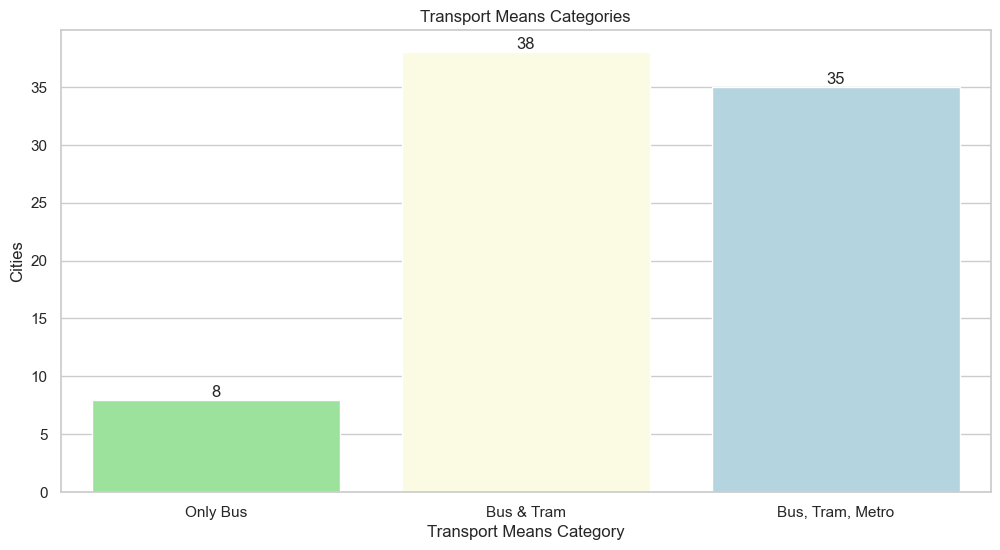

In [78]:
# Define the order of categories
category_order = ["Only Bus", "Bus & Tram", "Bus, Tram, Metro"]

# Count the occurrences of each category in the "Transport_Means_Category" column
category_counts = df_cleaned_transport_means['Transport_Means_Category'].value_counts().reindex(category_order)

# Create the bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values, palette=['lightgreen', 'lightyellow', 'lightblue'])
plt.title('Transport Means Categories')
plt.xlabel('Transport Means Category')
plt.ylabel('Cities')

# Add counts above the bars
for index, value in enumerate(category_counts.values):
    barplot.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.show()

In [79]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Transport_Means_Category', data=df_cleaned_transport_means)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0005 4.0000 75.0000 40467.8229 0.0000
         Pillai's trace    0.9995 4.0000 75.0000 40467.8229 0.0000
 Hotelling-Lawley trace 2158.2839 4.0000 75.0000 40467.8229 0.0000
    Roy's greatest root 2158.2839 4.0000 75.0000 40467.8229 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
    Transport_Means_Category Value  Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
               Wilks' lambda 0.7506 8.0000 150.0000  2.8924 0.0050
              Pi

Όλοι οι δείκτες του one-way MANOVA είναι κάτω του 0,05

In [80]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_transport_means[dep_var], df_cleaned_transport_means['Transport_Means_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
      Bus & Tram Bus, Tram, Metro   4.8853   0.15  -1.3084 11.0791  False
      Bus & Tram         Only Bus  -0.0074    1.0 -10.2914 10.2766  False
Bus, Tram, Metro         Only Bus  -4.8927 0.4997 -15.2531  5.4676  False
-------------------------------------------------------------------------


Tukey HSD test results for Bicycle:

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
      Bus & Tram Bus, Tram, Metro   -1.963 0.5686  -6.5758 2.6498  False
      Bus & Tram         Only Bus  -5.3222  0.227 -12.9812 2.3368  False
Bus, Tram, Metro         Only Bus  -3.359

Είναι εμφανές πως η ύπαρξη όλο και μεγαλύτερης γκάμας μέσων μετφοράς (ειδικά με την προσθήκη του μετρό) επηρεάζει άμεσα τόσο το ποσοστό της χρήσης Μ.Μ.Μ. (αυξάνεται) όσο και το ποσοστό χρήσης της ιδιωτικής μετακίνησης (μειώνεται).

In [81]:
# Define independent variable (Transport_Means_Category) and dependent variables
X = df_cleaned_transport_means[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_transport_means['Transport_Means_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Only Bus', 'Bus & Tram', 'Bus, Tram, Metro']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                   Walking   Bicycle  Public_Transport  Private_Vehicle
Only Bus         -0.469150 -0.515127         -0.509550        -0.416053
Bus & Tram        0.143969  0.179180          0.153266         0.161146
Bus, Tram, Metro -0.049075 -0.076795         -0.049935        -0.079860


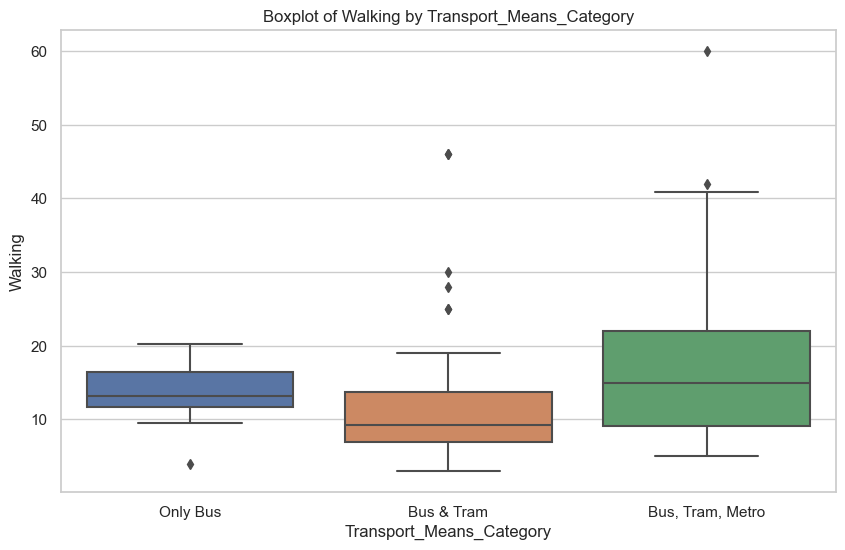

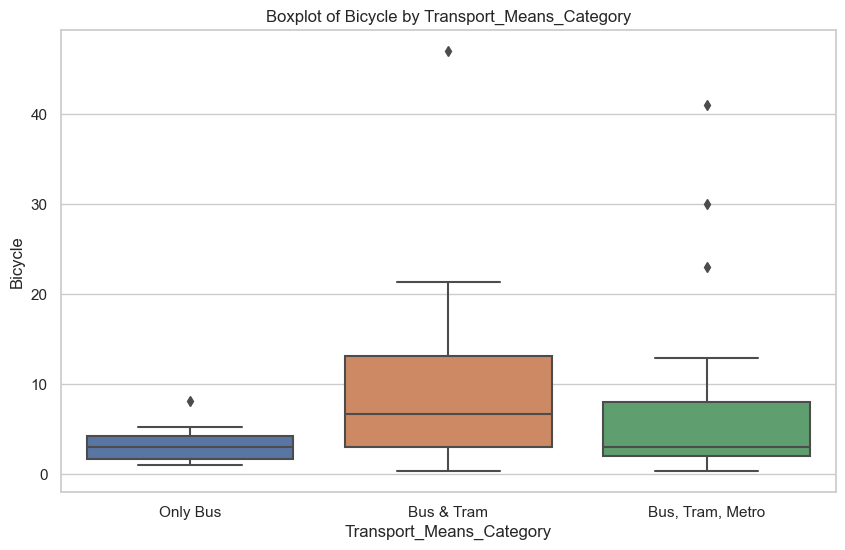

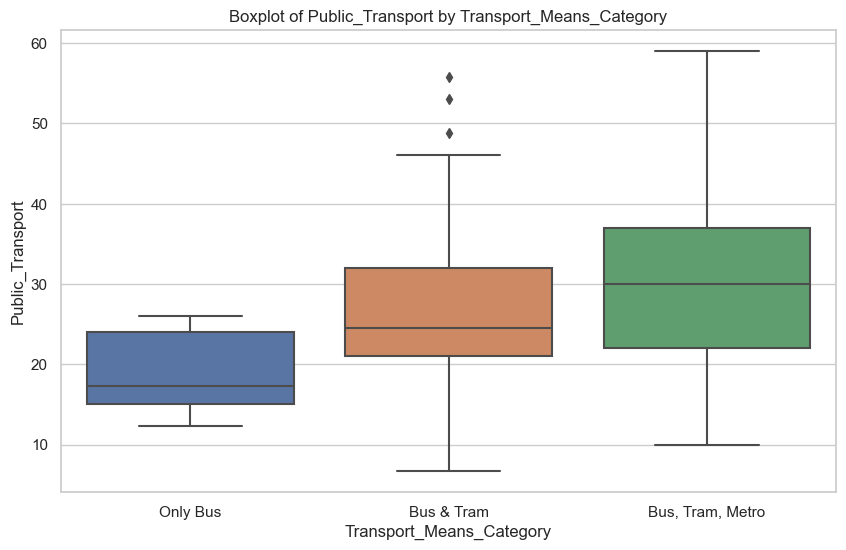

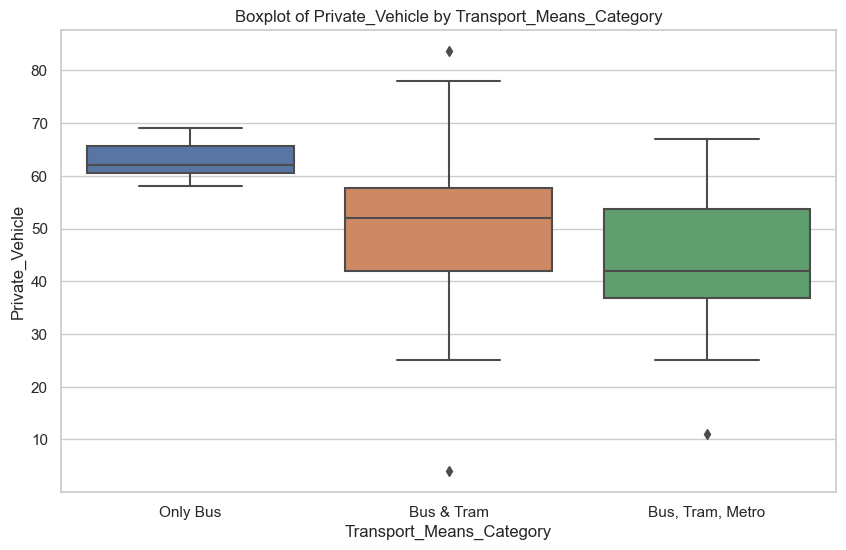

In [82]:
# Boxplot visualization for each dependent variable by Transport_Means_Category
order = ['Only Bus', 'Bus & Tram', 'Bus, Tram, Metro']

for dep_var in dependent_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Transport_Means_Category', y=dep_var, data=df_cleaned_transport_means, order=order)
    plt.title(f'Boxplot of {dep_var} by Transport_Means_Category')
    plt.show()

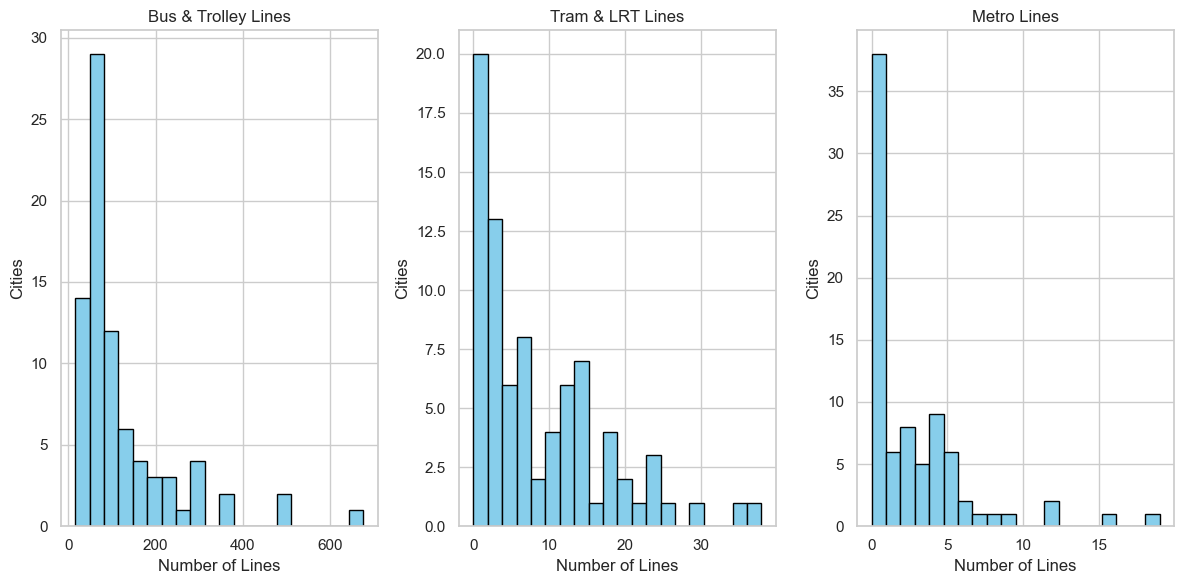

In [83]:
# Select the columns of interest
columns_of_pt = ["Bus & Trolley Lines", "Tram & LRT Lines", "Metro Lines"]

# Plot histograms for each selected column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_of_pt, 1):
    plt.subplot(1, len(columns_of_pt), i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Number of Lines')
    plt.ylabel('Cities')

plt.tight_layout()
plt.show()

# Bus Lines Categories

1. Below 50 lines
2. 50 - 100 lines
3. 100 - 150 lines
4. Above 150 lines

In [84]:
df[["Bus & Trolley Lines"]].describe().round(2)

,Bus & Trolley Lines
count,81.00
mean,124.04
std,117.31
min,16.00
25%,52.00
50%,78.00
75%,140.00
max,675.00


In [85]:
# Define the bins and corresponding labels
bins = [0, 50, 100, 150, float('inf')]
labels = ['Below 50 lines', '50 - 100 lines', '100 - 150 lines', 'Above 150 lines']

# Create the new categorical column
df['Bus_Trolley_Lines_Category'] = pd.cut(df['Bus & Trolley Lines'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_bus_trolley_lines = df.dropna(subset=['Bus_Trolley_Lines_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_bus_trolley_lines['Bus_Trolley_Lines_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_bus_trolley_lines['Bus_Trolley_Lines_Category'].value_counts()
print(category_counts)

['100 - 150 lines', '50 - 100 lines', 'Above 150 lines', 'Below 50 lines']
Categories (4, object): ['Below 50 lines' < '50 - 100 lines' < '100 - 150 lines' < 'Above 150 lines']
Bus_Trolley_Lines_Category
50 - 100 lines     33
Above 150 lines    18
Below 50 lines     15
100 - 150 lines    15
Name: count, dtype: int64


In [86]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Bus_Trolley_Lines_Category', data=df_cleaned_bus_trolley_lines)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
        Intercept         Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
           Wilks' lambda   0.0012 4.0000 74.0000 15107.5720 0.0000
          Pillai's trace   0.9988 4.0000 74.0000 15107.5720 0.0000
  Hotelling-Lawley trace 816.6255 4.0000 74.0000 15107.5720 0.0000
     Roy's greatest root 816.6255 4.0000 74.0000 15107.5720 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
 Bus_Trolley_Lines_Category Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.7221 12.0000 196.0771  2.1395 0.0161
             Pil

In [87]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_bus_trolley_lines[dep_var], df_cleaned_bus_trolley_lines['Bus_Trolley_Lines_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
100 - 150 lines  50 - 100 lines  -5.4119 0.4016  -14.463  3.6391  False
100 - 150 lines Above 150 lines  -0.1869    1.0 -10.3484  9.9746  False
100 - 150 lines  Below 50 lines   0.4553 0.9995  -10.158 11.0686  False
 50 - 100 lines Above 150 lines   5.2251 0.3785  -3.2917 13.7418  False
 50 - 100 lines  Below 50 lines   5.8673 0.3295  -3.1838 14.9183  False
Above 150 lines  Below 50 lines   0.6422 0.9984  -9.5192 10.8037  False
-----------------------------------------------------------------------


Tukey HSD test results for Bicycle:

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------

Παρατηρείται πως ο αριθμός των γραμμών επηρεάζει μόνο την προτίμηση των Μ.Μ.Μ. με αναλογικό τρόπο.

In [88]:
# Define independent variable (Bus_Trolley_Lines_Category) and dependent variables
X = df_cleaned_bus_trolley_lines[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_bus_trolley_lines['Bus_Trolley_Lines_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Below 50 lines', '50 - 100 lines', '100 - 150 lines', 'Above 150 lines']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                  Walking   Bicycle  Public_Transport  Private_Vehicle
Below 50 lines   0.179475  0.236125          0.100154         0.153921
50 - 100 lines  -0.138545 -0.120938         -0.116505        -0.107853
100 - 150 lines -0.024038 -0.067483         -0.035732        -0.036089
Above 150 lines  0.124468  0.081184          0.159908         0.099538


# Tram Lines Categories

1. 0 Lines
2. 1 - 5 Lines
3. 6 - 10 Lines
4. 11 - 15 Lines
5. 16+ Lines

In [89]:
df[["Tram & LRT Lines"]].describe().round(2)

,Tram & LRT Lines
count,81.00
mean,8.56
std,8.71
min,0.00
25%,2.00
50%,6.00
75%,14.00
max,38.00


In [90]:
# Define the bins and corresponding labels
bins = [0, 1, 6, 11, 16, float('inf')]
labels = ['0 Lines', '1 - 5 Lines', '6 - 10 Lines', '11 - 15 Lines', '16+ Lines']

# Create the new categorical column
df['Tram_LRT_Lines_Category'] = pd.cut(df['Tram & LRT Lines'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_tram_lrt_lines = df.dropna(subset=['Tram_LRT_Lines_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_tram_lrt_lines['Tram_LRT_Lines_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_tram_lrt_lines['Tram_LRT_Lines_Category'].value_counts()
print(category_counts)

['16+ Lines', '11 - 15 Lines', '1 - 5 Lines', '6 - 10 Lines', '0 Lines']
Categories (5, object): ['0 Lines' < '1 - 5 Lines' < '6 - 10 Lines' < '11 - 15 Lines' < '16+ Lines']
Tram_LRT_Lines_Category
1 - 5 Lines      23
0 Lines          16
16+ Lines        15
6 - 10 Lines     14
11 - 15 Lines    13
Name: count, dtype: int64


In [91]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Tram_LRT_Lines_Category', data=df_cleaned_tram_lrt_lines)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value   Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0011 4.0000 73.0000 16409.6046 0.0000
         Pillai's trace   0.9989 4.0000 73.0000 16409.6046 0.0000
 Hotelling-Lawley trace 899.1564 4.0000 73.0000 16409.6046 0.0000
    Roy's greatest root 899.1564 4.0000 73.0000 16409.6046 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
   Tram_LRT_Lines_Category Value   Num DF  Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.4627 16.0000 223.6563  4.0114 0.0000
            Pillai's trace 0.6

In [92]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_tram_lrt_lines[dep_var], df_cleaned_tram_lrt_lines['Tram_LRT_Lines_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
      0 Lines   1 - 5 Lines   3.5484 0.8597  -6.4822 13.5791  False
      0 Lines 11 - 15 Lines  -5.1037 0.7283 -16.6088  6.4013  False
      0 Lines     16+ Lines   2.9763 0.9435  -8.0976 14.0501  False
      0 Lines  6 - 10 Lines    3.467 0.9108  -7.8091  14.743  False
  1 - 5 Lines 11 - 15 Lines  -8.6522  0.169 -19.3436  2.0393  False
  1 - 5 Lines     16+ Lines  -0.5722 0.9999 -10.7981  9.6538  False
  1 - 5 Lines  6 - 10 Lines  -0.0815    1.0 -10.5261 10.3632  False
11 - 15 Lines     16+ Lines     8.08 0.3087  -3.5957 19.7557  False
11 - 15 Lines  6 - 10 Lines   8.5707 0.2674   -3.297 20.4384  False
    16+ Lines  6 - 10 Lines   0.4907    1.0 -10.9594 11.9409  False
-------------------------------------------------------------------


Tukey HSD

Τα αποτελέσματα είναι αντίστοιχα με αυτά των γραμμών λεωφορείων, όμως σε αυτή την περίπτωση επηρεάζεται και το ποσοστό της ιδιωτικής μετακίνησης.

In [93]:
# Define independent variable (Tram_LRT_Lines_Category) and dependent variables
X = df_cleaned_tram_lrt_lines[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_tram_lrt_lines['Tram_LRT_Lines_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['0 Lines', '1 - 5 Lines', '6 - 10 Lines', '11 - 15 Lines', '16+ Lines']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                Walking   Bicycle  Public_Transport  Private_Vehicle
0 Lines       -0.066355 -0.120080         -0.137770        -0.023309
1 - 5 Lines    0.162577  0.136094          0.098122         0.155200
6 - 10 Lines   0.184221  0.181684          0.135839         0.169163
11 - 15 Lines -0.437582 -0.322839         -0.309045        -0.410685
16+ Lines      0.028793  0.029630          0.137557        -0.015070


# Metro Lines Categories

1. 0 Lines
2. 1 - 2 Lines
3. 3 - 4 Lines
4. 5 - 6 Lines
5. 6+ Lines

In [94]:
df[["Metro Lines"]].describe().round(2)

,Metro Lines
count,81.00
mean,2.44
std,3.65
min,0.00
25%,0.00
50%,1.00
75%,4.00
max,19.00


In [95]:
# Define the bins and corresponding labels
bins = [0, 1, 3, 5, float('inf')]
labels = ['0 Lines', '1 - 2 Lines', '3 - 4 Lines', '5+ Lines']

# Create the new categorical column
df['Metro_Lines_Category'] = pd.cut(df['Metro Lines'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_metro_lines = df.dropna(subset=['Metro_Lines_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_metro_lines['Metro_Lines_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_metro_lines['Metro_Lines_Category'].value_counts()
print(category_counts)

['5+ Lines', '0 Lines', '3 - 4 Lines', '1 - 2 Lines']
Categories (4, object): ['0 Lines' < '1 - 2 Lines' < '3 - 4 Lines' < '5+ Lines']
Metro_Lines_Category
0 Lines        38
5+ Lines       15
1 - 2 Lines    14
3 - 4 Lines    14
Name: count, dtype: int64


In [96]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Metro_Lines_Category', data=df_cleaned_metro_lines)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0005 4.0000 74.0000 37976.7258 0.0000
         Pillai's trace    0.9995 4.0000 74.0000 37976.7258 0.0000
 Hotelling-Lawley trace 2052.7960 4.0000 74.0000 37976.7258 0.0000
    Roy's greatest root 2052.7960 4.0000 74.0000 37976.7258 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
      Metro_Lines_Category  Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.7666 12.0000 196.0771  1.7271 0.0635
             Pil

Οι πρώτοι τρεις δείκτες είναι οριακά επάνω από το 0,05 και το Roy's greatest root είναι μικρότερο από 0,05 οπότε ίσως από τα post-hoc tests προκύψουν στατιστικά σημαντικές διφορές.

In [97]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_metro_lines[dep_var], df_cleaned_metro_lines['Metro_Lines_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    0 Lines 1 - 2 Lines   1.1891 0.9857  -7.848 10.2262  False
    0 Lines 3 - 4 Lines    5.197 0.4365 -3.8402 14.2341  False
    0 Lines    5+ Lines   7.2055 0.1477 -1.6087 16.0198  False
1 - 2 Lines 3 - 4 Lines   4.0079 0.7706 -6.9175 14.9332  False
1 - 2 Lines    5+ Lines   6.0164 0.4599 -4.7253 16.7581  False
3 - 4 Lines    5+ Lines   2.0086 0.9609 -8.7331 12.7503  False
--------------------------------------------------------------


Tukey HSD test results for Bicycle:

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
    0 Lines 1 - 2 Lines  -4.5136 0.3094 -11.3183   2.291  False
    0 Lines 3 - 4 Lines  -1.7436  0.90

Παρατηρείται πως η επέκταση του δικτύου του μετρό ρίχνει ραγδαία την προτίμηση της ιδιωτικής μετακίνησης, καθώς το μετρό καλύπτει γρήγορα μεγάλες αποστάσεις.

In [98]:
# Define independent variable (Metro_Lines_Category) and dependent variables
X = df_cleaned_metro_lines[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_metro_lines['Metro_Lines_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['0 Lines', '1 - 2 Lines', '3 - 4 Lines', '5+ Lines']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
              Walking   Bicycle  Public_Transport  Private_Vehicle
0 Lines      0.011538  0.043337          0.018760         0.034425
1 - 2 Lines  0.183890  0.156594          0.166997         0.220690
3 - 4 Lines -0.147574 -0.177142         -0.138121        -0.185251
5+ Lines    -0.063124 -0.090611         -0.074478        -0.120287


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


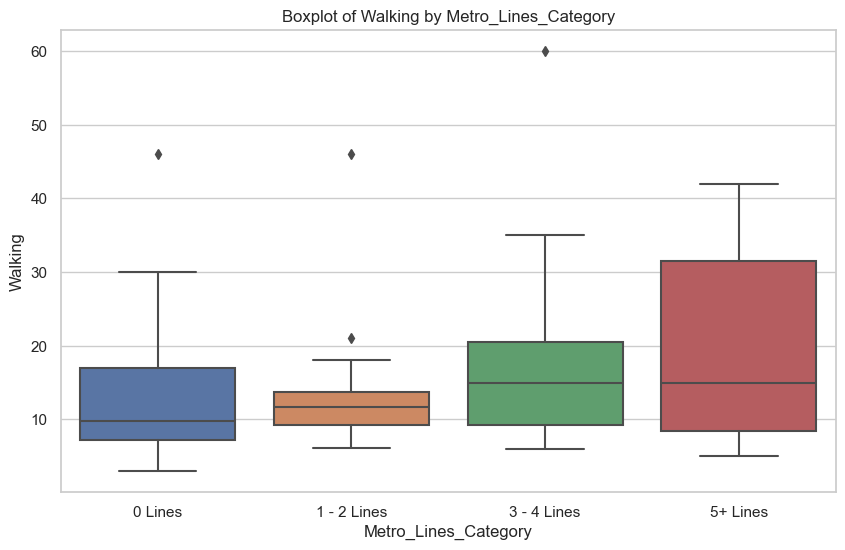

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


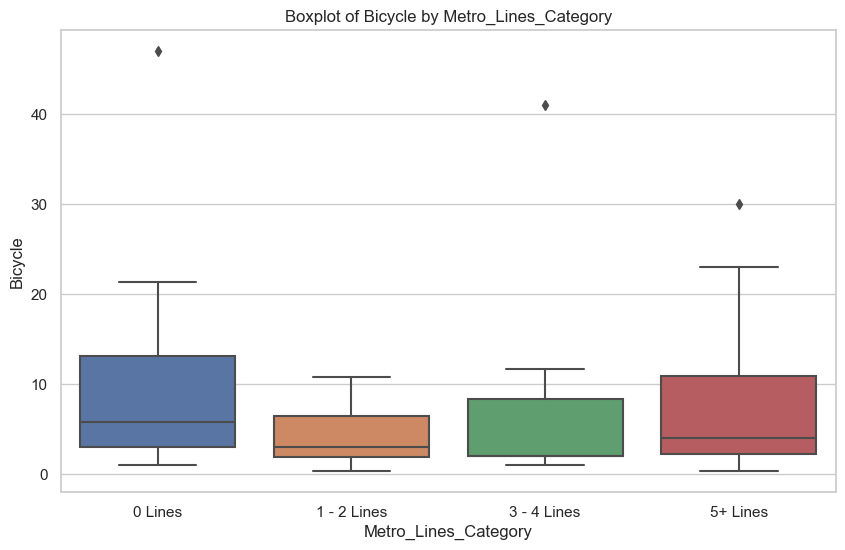

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


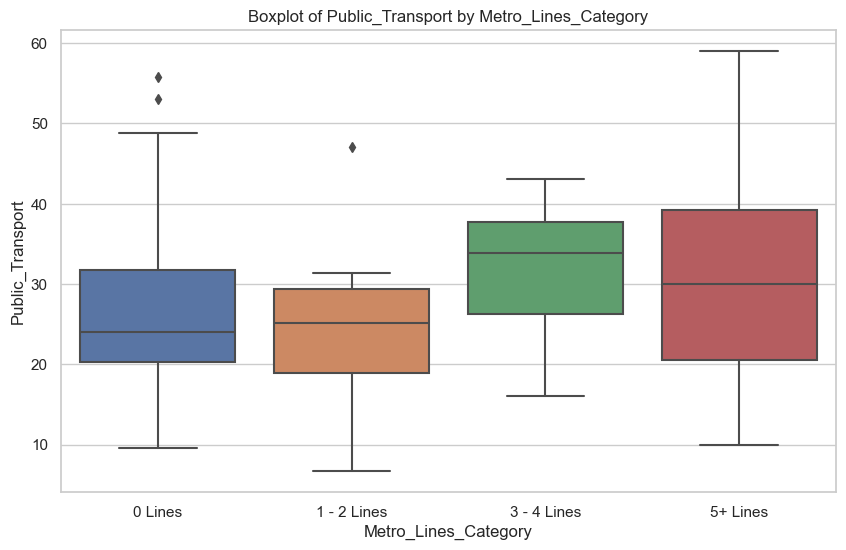

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


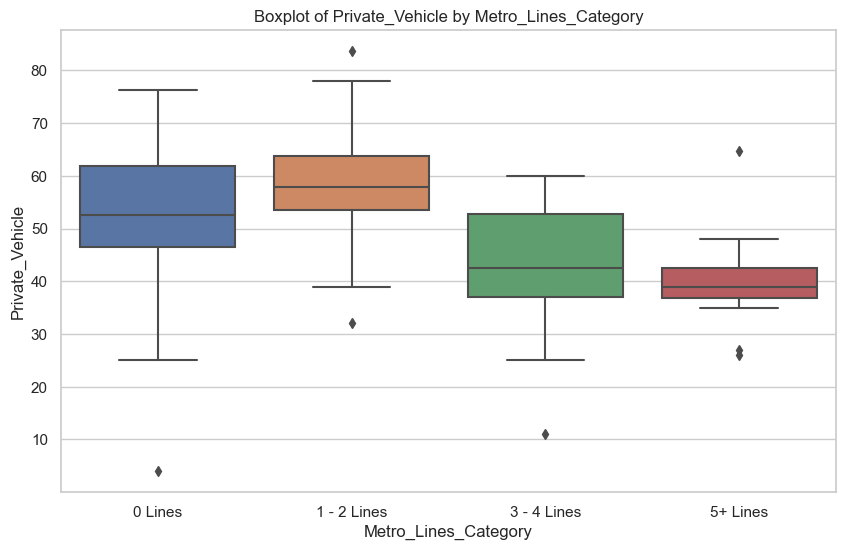

In [99]:
# Boxplot visualization for each dependent variable by Metro_Lines_Category
order = ['0 Lines', '1 - 2 Lines', '3 - 4 Lines', '5+ Lines']

for dep_var in dependent_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Metro_Lines_Category', y=dep_var, data=df_cleaned_metro_lines, order=order)
    plt.title(f'Boxplot of {dep_var} by Metro_Lines_Category')
    plt.show()


# Metro Network Categories



In [100]:
df[["Metro Network (km)"]].describe().round(2)

,Metro Network (km)
count,81.00
mean,42.72
std,79.28
min,0.00
25%,0.00
50%,10.40
75%,60.00
max,553.00


In [101]:
# Define the bins and corresponding labels
bins = [0, 1, 51, 101, float('inf')]
labels = ['0 km', '1 - 50 km', '51 - 100 km', '101+ km']

# Create the new categorical column
df['Metro_Network_Category'] = pd.cut(df['Metro Network (km)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_metro_network = df.dropna(subset=['Metro_Network_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_metro_network['Metro_Network_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_metro_network['Metro_Network_Category'].value_counts()
print(category_counts)

['51 - 100 km', '0 km', '1 - 50 km', '101+ km']
Categories (4, object): ['0 km' < '1 - 50 km' < '51 - 100 km' < '101+ km']
Metro_Network_Category
0 km           38
1 - 50 km      20
51 - 100 km    13
101+ km        10
Name: count, dtype: int64


In [102]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Metro_Network_Category', data=df_cleaned_metro_network)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0005 4.0000 74.0000 37663.6888 0.0000
         Pillai's trace    0.9995 4.0000 74.0000 37663.6888 0.0000
 Hotelling-Lawley trace 2035.8751 4.0000 74.0000 37663.6888 0.0000
    Roy's greatest root 2035.8751 4.0000 74.0000 37663.6888 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
     Metro_Network_Category Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.7611 12.0000 196.0771  1.7761 0.0543
             Pil

In [103]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_metro_network[dep_var], df_cleaned_metro_network['Metro_Network_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
     0 km   1 - 50 km     0.32 0.9995  -7.4839   8.124  False
     0 km     101+ km   7.7255 0.1894  -2.3145 17.7656  False
     0 km 51 - 100 km   8.7563 0.0627  -0.3204  17.833  False
1 - 50 km     101+ km   7.4055  0.292  -3.5354 18.3464  False
1 - 50 km 51 - 100 km   8.4363  0.132  -1.6279 18.5004  False
  101+ km 51 - 100 km   1.0308 0.9958 -10.8515  12.913  False
-------------------------------------------------------------


Tukey HSD test results for Bicycle:

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     0 km   1 - 50 km  -1.5969 0.8993  -7.6441 4.4503  False
     0 km     101+ km  -1.5379 0.9543  -9.3178  6.242  False

Τα αποτελέσματα είναι παρόμοια με αυτά των γραμμών του δικτύου του μετρό.

In [104]:
# Define independent variable (Metro_Network_Category) and dependent variables
X = df_cleaned_metro_network[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_metro_network['Metro_Network_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['0 km', '1 - 50 km', '51 - 100 km', '101+ km']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
              Walking   Bicycle  Public_Transport  Private_Vehicle
0 km         0.012062  0.047558          0.019938         0.036916
1 - 50 km    0.075680  0.092948          0.072949         0.107049
51 - 100 km -0.159964 -0.251490         -0.172767        -0.230445
101+ km      0.010756 -0.039680          0.002935        -0.054801


# Public Transport Network Categories

1. Below 500 km
2. 500 - 1000 km
3. 1000 - 1500 km
4. 1500+ km

In [105]:
df[["Public Transport Network (km)"]].describe().round(2)

,Public Transport Network (km)
count,81.00
mean,1618.57
std,3060.08
min,0.00
25%,285.60
50%,640.00
75%,1567.40
max,20981.00


In [106]:
# Define the bins and corresponding labels
bins = [0, 500, 1000, 1500, float('inf')]
labels = ['Below 500 km', '500 - 1000 km', '1000 - 1500 km', '1500+ km']

# Create the new categorical column
df['Public_Transport_Network_Category'] = pd.cut(df['Public Transport Network (km)'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the 'Bus & Trolley Network (km)' column
df_cleaned_public_transport_network = df.dropna(subset=['Bus & Trolley Network (km)'])

# Check the unique values in the new categorical column
print(df_cleaned_public_transport_network['Public_Transport_Network_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_public_transport_network['Public_Transport_Network_Category'].value_counts()
print(category_counts)

['1000 - 1500 km', '500 - 1000 km', '1500+ km', 'Below 500 km']
Categories (4, object): ['Below 500 km' < '500 - 1000 km' < '1000 - 1500 km' < '1500+ km']
Public_Transport_Network_Category
500 - 1000 km     27
1500+ km          21
Below 500 km       9
1000 - 1500 km     5
Name: count, dtype: int64


In [107]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Public_Transport_Network_Category', data=df_cleaned_public_transport_network)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                        Multivariate linear model
                                                                         
--------------------------------------------------------------------------
            Intercept          Value    Num DF   Den DF   F Value   Pr > F
--------------------------------------------------------------------------
               Wilks' lambda    0.0015  4.0000  55.0000  8971.7356  0.0000
              Pillai's trace    0.9985  4.0000  55.0000  8971.7356  0.0000
      Hotelling-Lawley trace  652.4899  4.0000  55.0000  8971.7356  0.0000
         Roy's greatest root  652.4899  4.0000  55.0000  8971.7356  0.0000
-------------------------------------------------------------------------
                                                                         
-------------------------------------------------------------------------
 Public_Transport_Network_Category Value   Num DF  Den DF  F Value Pr > F
-------------------------------------------------------

In [108]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_public_transport_network[dep_var], df_cleaned_public_transport_network['Public_Transport_Network_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
1000 - 1500 km      1500+ km  -9.3076 0.2724  -22.801  4.1858  False
1000 - 1500 km 500 - 1000 km  -13.737 0.0384  -26.939 -0.5351   True
1000 - 1500 km  Below 500 km -18.1422 0.0126 -33.2669 -3.0175   True
      1500+ km 500 - 1000 km  -4.4294  0.453 -12.3191  3.4602  False
      1500+ km  Below 500 km  -8.8346 0.1459  -19.638  1.9688  False
 500 - 1000 km  Below 500 km  -4.4052  0.681 -14.8422  6.0318  False
--------------------------------------------------------------------


Tukey HSD test results for Bicycle:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------
1000 - 1500 km      1500+ km  

Παρατηρείται πως τα χιλιόμετρα του δικτύου επηρεάζουν την ιδιωτική μετακίνηση, καθώς όσο μειώνονται τόσο αυξάνεται το ποσοστό του ιδιωτικού οχήματος. Επίσης επηρεάζουν το περπάτημα, αντιστρόφως ανάλογα. Το εύρημα φαίνεται λογικό, γιατί όταν το δίκτυο των μέσων μεταφοράς είναι μικρό και ο μετακινούμενος δεν διαθέτει την δυνατότητα μετακίνησης με αυτοκίνητο, θα καταφύγει στην μετακίνηση με τα πόδια.

In [109]:
# Define independent variable (Public_Transport_Network_Category) and dependent variables
X = df_cleaned_public_transport_network[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_public_transport_network['Public_Transport_Network_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Below 500 km', '500 - 1000 km', '1000 - 1500 km', '1500+ km']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                 Walking   Bicycle  Public_Transport  Private_Vehicle
Below 500 km    0.201522  0.239520          0.258130         0.286541
500 - 1000 km  -0.080463 -0.029144         -0.092813        -0.052188
1000 - 1500 km  0.029561 -0.095872         -0.031718        -0.129344
1500+ km        0.010048 -0.042355          0.016256        -0.024908


# GDP per Capita / Yearly Ticket Cost Categories

1. Low Ratio: Below 50
2. Moderate Ratio: 50 - 75
3. High Ratio: 75 - 100
4. Very High Ratio: Above 100

In [110]:
df[["GDP / Ticket Cost"]].describe().round(2)

,GDP / Ticket Cost
count,81.00
mean,66.01
std,25.13
min,24.40
25%,47.92
50%,63.64
75%,83.16
max,127.63


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


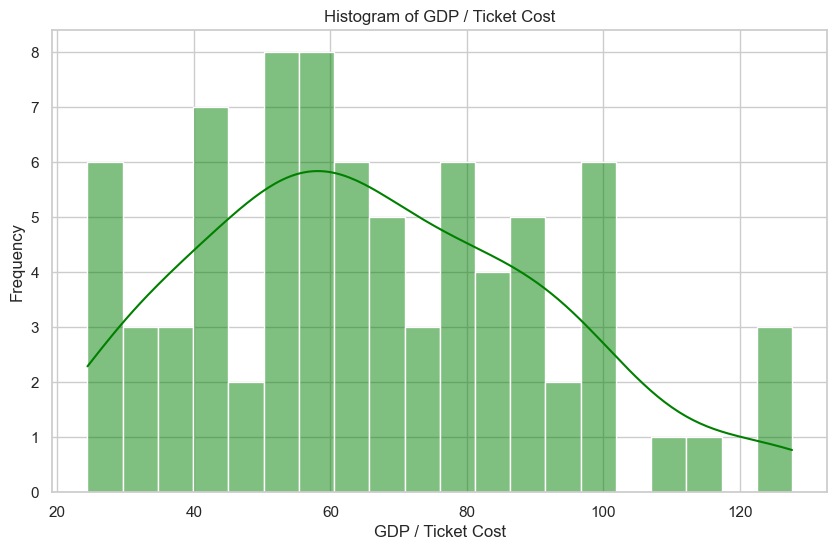

In [111]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['GDP / Ticket Cost'], bins=20, kde=True, color='green')

# Add titles and labels
plt.title('Histogram of GDP / Ticket Cost')
plt.xlabel('GDP / Ticket Cost')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [112]:
# Define the bins and corresponding labels
bins = [0, 50, 75, 100, float('inf')]
labels = ['Low Ratio', 'Moderate Ratio', 'High Ratio', 'Very High Ratio']

# Create the new categorical column
df['GDP_Ticket_Ratio_Category'] = pd.cut(df['GDP / Ticket Cost'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_gdp_ticket = df.dropna(subset=['GDP_Ticket_Ratio_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_gdp_ticket['GDP_Ticket_Ratio_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_gdp_ticket['GDP_Ticket_Ratio_Category'].value_counts()
print(category_counts)

['Moderate Ratio', 'High Ratio', 'Low Ratio', 'Very High Ratio']
Categories (4, object): ['Low Ratio' < 'Moderate Ratio' < 'High Ratio' < 'Very High Ratio']
GDP_Ticket_Ratio_Category
Moderate Ratio     31
High Ratio         22
Low Ratio          21
Very High Ratio     7
Name: count, dtype: int64


In [113]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ GDP_Ticket_Ratio_Category', data=df_cleaned_gdp_ticket)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0009 4.0000 74.0000 20717.5338 0.0000
         Pillai's trace    0.9991 4.0000 74.0000 20717.5338 0.0000
 Hotelling-Lawley trace 1119.8667 4.0000 74.0000 20717.5338 0.0000
    Roy's greatest root 1119.8667 4.0000 74.0000 20717.5338 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
  GDP_Ticket_Ratio_Category Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.5047 12.0000 196.0771  4.8184 0.0000
             Pil

In [114]:
# Perform Tukey's HSD test for each dependent variable
dependent_variables = ['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']

for dep_var in dependent_variables:
    print(f"Tukey HSD test results for {dep_var}:\n")
    mc = MultiComparison(df_cleaned_gdp_ticket[dep_var], df_cleaned_gdp_ticket['GDP_Ticket_Ratio_Category'])
    result = mc.tukeyhsd()
    print(result)
    print("\n")

Tukey HSD test results for Walking:

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2     meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------
    High Ratio       Low Ratio   4.1405 0.5475  -4.0408 12.3218  False
    High Ratio  Moderate Ratio   0.8439 0.9909  -6.6319  8.3196  False
    High Ratio Very High Ratio  18.2386 0.0005   6.6014 29.8757   True
     Low Ratio  Moderate Ratio  -3.2966 0.6647 -10.8757  4.2825  False
     Low Ratio Very High Ratio  14.0981 0.0117   2.3943 25.8019   True
Moderate Ratio Very High Ratio  17.3947 0.0006   6.1727 28.6167   True
----------------------------------------------------------------------


Tukey HSD test results for Bicycle:

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2     meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------
 

Η στήλη GDP per Capita / Ticket Price φανερώνει πόσες φορές μεγαλύτερο είναι το GDP από τα ετήσια έξοδα για τη χρήση των μέσων μαζικής μεταφοράς. Επομένως, είναι κατανοητό πως όσο μεγαλύτερη είναι η τιμή του κλάσματος, τόσο ευκολότερη είναι η απόκτηση εισιτηρίων Μ.Μ.Μ.. Από τα post-hoc tests φαίνεται πως όσο μικραίνει η τιμή του κλάσματος τόσο μικρότερη είναι η πιθανότητα να επιλέξει ο μετακινούμενος τα Μ.Μ.Μ. ενώ τόσο μεγαλύτερη είναι η πιθανότητα της ιδιωτικής μετακίνησης.

In [115]:
# Define independent variable (GDP_Ticket_Ratio_Category) and dependent variables
X = df_cleaned_gdp_ticket[['Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle']]
y = df_cleaned_gdp_ticket['GDP_Ticket_Ratio_Category']

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X, y)

# Get coefficients of linear discriminants
coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=lda.classes_)
coefficients = coefficients.loc[['Low Ratio', 'Moderate Ratio', 'High Ratio', 'Very High Ratio']]

print("Coefficients of linear discriminants:")
print(coefficients)

Coefficients of linear discriminants:
                  Walking   Bicycle  Public_Transport  Private_Vehicle
Low Ratio       -0.118810 -0.187024         -0.170537        -0.093768
Moderate Ratio   0.086638  0.105967          0.088929         0.117310
High Ratio      -0.008285  0.050388          0.064656        -0.009763
Very High Ratio -0.001216 -0.066575         -0.085421        -0.207528


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


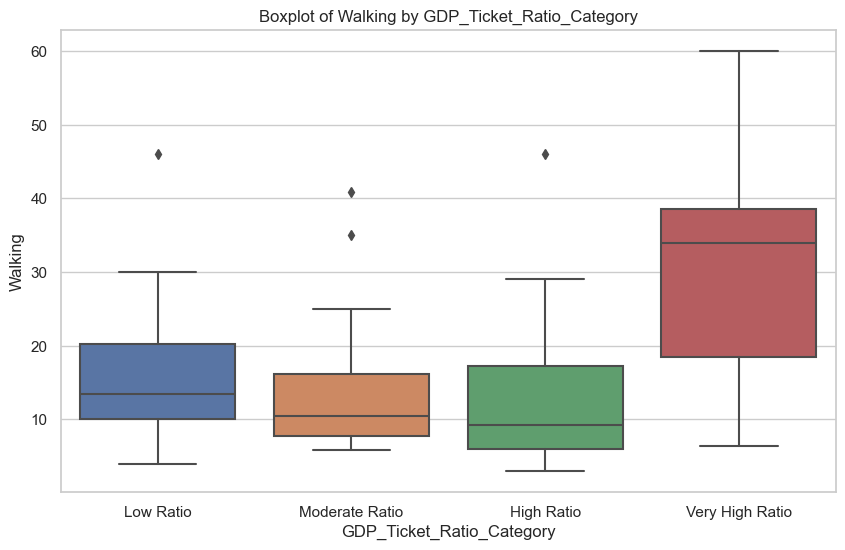

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


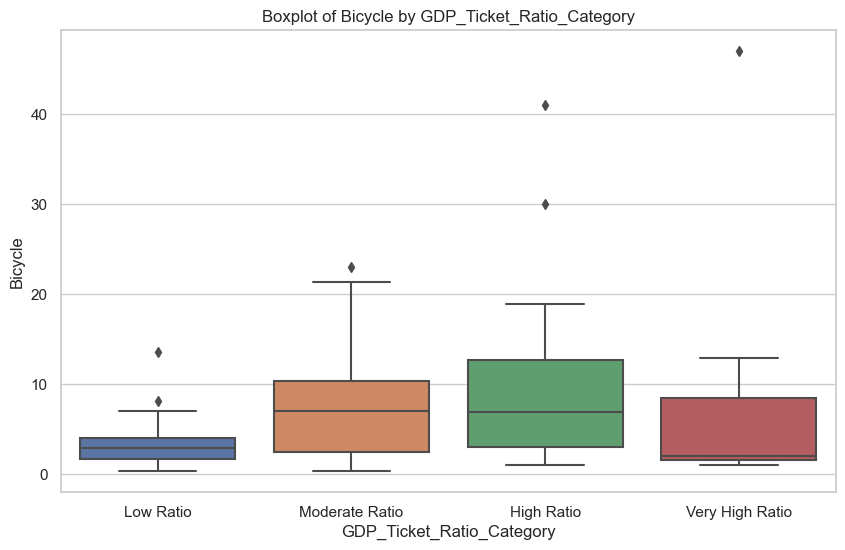

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


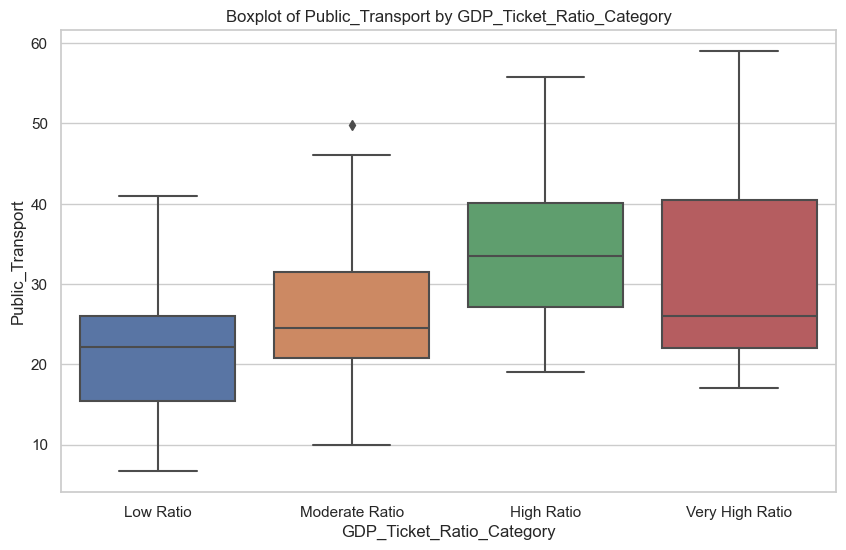

C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


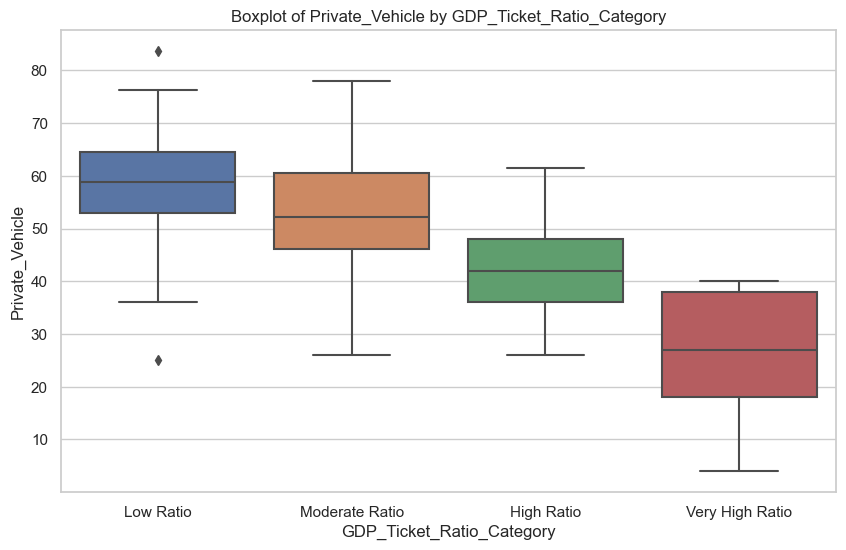

In [116]:
# Boxplot visualization for each dependent variable by GDP_Ticket_Ratio_Category
for dep_var in dependent_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GDP_Ticket_Ratio_Category', y=dep_var, data=df_cleaned_gdp_ticket)
    plt.title(f'Boxplot of {dep_var} by GDP_Ticket_Ratio_Category')
    plt.show()

# Registered Cars

1. Below 300
2. 300 - 400
3. 400 - 500
4. Above 500

In [117]:
df[["Registered Cars per 1000 Population"]].describe().round(2)

,Registered Cars per 1000 Population
count,74.00
mean,434.77
std,124.43
min,237.22
25%,352.54
50%,410.29
75%,501.24
max,773.04


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


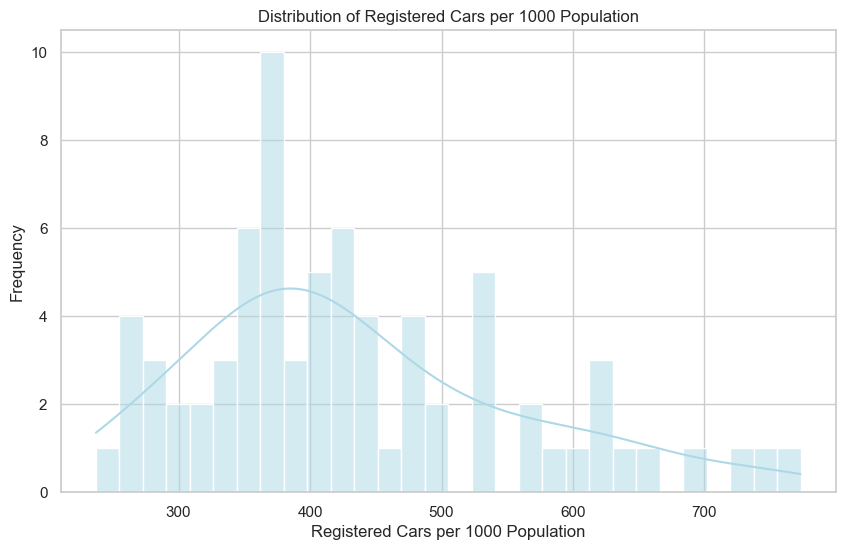

In [118]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Registered Cars per 1000 Population'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Registered Cars per 1000 Population')
plt.xlabel('Registered Cars per 1000 Population')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [119]:
# Define the bins and corresponding labels
bins = [0, 300, 400, 500, float('inf')]
labels = ['Below 300', '300 - 400', '400 - 500', 'Above 500']

# Create the new categorical column
df['Cars_per_1000_Category'] = pd.cut(df['Registered Cars per 1000 Population'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_cars = df.dropna(subset=['Cars_per_1000_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_cars['Cars_per_1000_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_cars['Cars_per_1000_Category'].value_counts()
print(category_counts)

['300 - 400', 'Above 500', '400 - 500', 'Below 300']
Categories (4, object): ['Below 300' < '300 - 400' < '400 - 500' < 'Above 500']
Cars_per_1000_Category
300 - 400    24
400 - 500    21
Above 500    19
Below 300    10
Name: count, dtype: int64


In [120]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Cars_per_1000_Category', data=df_cleaned_cars)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0009 4.0000 67.0000 19591.6100 0.0000
         Pillai's trace    0.9991 4.0000 67.0000 19591.6100 0.0000
 Hotelling-Lawley trace 1169.6484 4.0000 67.0000 19591.6100 0.0000
    Roy's greatest root 1169.6484 4.0000 67.0000 19591.6100 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
     Cars_per_1000_Category Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.7755 12.0000 177.5568  1.4925 0.1305
             Pil

Οι δείκτες του one-way MANOVA είναι άνω του 0,05 και δείχνουν πως δεν υπάρχει τόσο μεγάλη συσχέτιση μεταξύ της ιδιοκτησίας αυτοκινήτων και του modal split.

# Road Safety Categories

1. Below 0.1
2. 0.1 - 0.2
3. 0.2 - 0.3
4. Above 0.3

In [121]:
df[["People Killed in Road Accidents per 10000 population"]].describe().round(2)

,People Killed in Road Accidents per 10000 population
count,76.00
mean,0.21
std,0.11
min,0.05
25%,0.12
50%,0.18
75%,0.27
max,0.57


In [122]:
# Define the bins and corresponding labels
bins = [0, 0.1, 0.2, 0.3, float('inf')]
labels = ['Below 0.1', '0.1 - 0.2', '0.2 - 0.3', 'Above 0.3']

# Create the new categorical column
df['Road_Accident_Deaths_Category'] = pd.cut(df['People Killed in Road Accidents per 10000 population'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_accidents = df.dropna(subset=['Road_Accident_Deaths_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_accidents['Road_Accident_Deaths_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_accidents['Road_Accident_Deaths_Category'].value_counts()
print(category_counts)

['0.1 - 0.2', '0.2 - 0.3', 'Above 0.3', 'Below 0.1']
Categories (4, object): ['Below 0.1' < '0.1 - 0.2' < '0.2 - 0.3' < 'Above 0.3']
Road_Accident_Deaths_Category
0.1 - 0.2    29
0.2 - 0.3    19
Above 0.3    17
Below 0.1    11
Name: count, dtype: int64


C:\Users\arist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


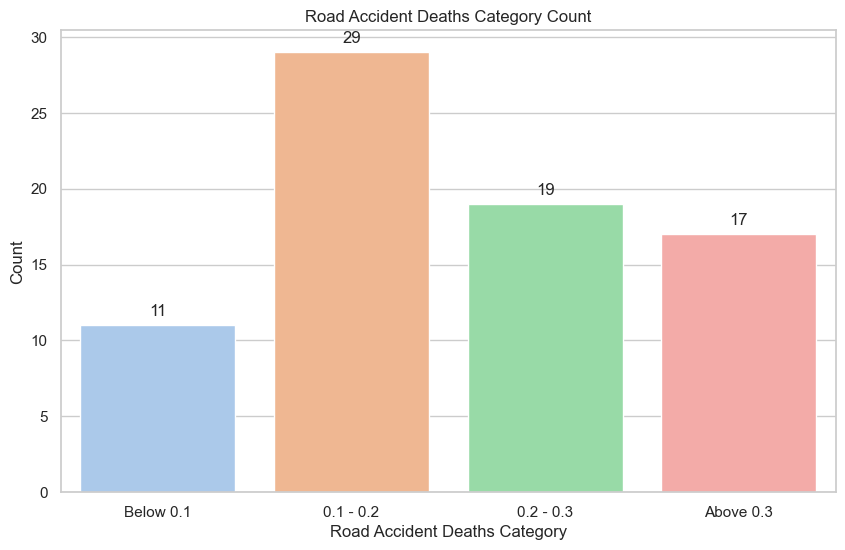

In [123]:
# Set the order of categories
category_order = ['Below 0.1', '0.1 - 0.2', '0.2 - 0.3', 'Above 0.3']

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned_accidents, x='Road_Accident_Deaths_Category', order=category_order, palette='pastel')
plt.title('Road Accident Deaths Category Count')
plt.xlabel('Road Accident Deaths Category')
plt.ylabel('Count')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

In [124]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Road_Accident_Deaths_Category', data=df_cleaned_accidents)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                      Multivariate linear model
                                                                     
---------------------------------------------------------------------
          Intercept          Value   Num DF  Den DF  F Value   Pr > F
---------------------------------------------------------------------
             Wilks' lambda    0.0008 4.0000 69.0000 21346.9699 0.0000
            Pillai's trace    0.9992 4.0000 69.0000 21346.9699 0.0000
    Hotelling-Lawley trace 1237.5055 4.0000 69.0000 21346.9699 0.0000
       Roy's greatest root 1237.5055 4.0000 69.0000 21346.9699 0.0000
---------------------------------------------------------------------
                                                                     
---------------------------------------------------------------------
 Road_Accident_Deaths_Category Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------------
                 Wilks' lambda 0.7601 12.0

Η πλειοψηφία των δεικτών του one-way MANOVA test είναι άνω του επιτρεπτού ορίου 0.05, γεγονός που σημαίνει πως η στατιστική διαφορά δεν είναι τόσο σημαντική ανάμεσα στις κατηγορίες των οδικών θανάτων ωστε να επηρεάζουν την επιλογή τρόπου μετακίνησης.

# Parking Spaces Categories

1. Below 10.000
2. 10.000 - 20.000
3. 20.000 - 30.000
4. Above 30.000'

In [125]:
df[["Public Parking Spaces"]].describe().round(2)

,Public Parking Spaces
count,54.00
mean,45310.72
std,79610.31
min,1360.00
25%,10350.00
50%,15783.50
75%,32750.00
max,437000.00


In [126]:
# Define the bins and corresponding labels
bins = [0, 10000, 20000, 30000, float('inf')]
labels = ['Below 10000', '10000 - 20000', '20000 - 30000', 'Above 30000']

# Create the new categorical column
df['Parking_Spaces_Category'] = pd.cut(df['Public Parking Spaces'], bins=bins, labels=labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_parking = df.dropna(subset=['Parking_Spaces_Category', 'Walking', 'Bicycle', 'Public_Transport', 'Private_Vehicle'])

# Check the unique values in the new categorical column
print(df_cleaned_parking['Parking_Spaces_Category'].unique())

# Print the count of each category
category_counts = df_cleaned_parking['Parking_Spaces_Category'].value_counts()
print(category_counts)

['Above 30000', '10000 - 20000', '20000 - 30000', 'Below 10000']
Categories (4, object): ['Below 10000' < '10000 - 20000' < '20000 - 30000' < 'Above 30000']
Parking_Spaces_Category
10000 - 20000    20
Above 30000      16
Below 10000      10
20000 - 30000     8
Name: count, dtype: int64


In [127]:
# Perform MANOVA
manova_model = MANOVA.from_formula('Walking + Bicycle + Public_Transport + Private_Vehicle ~ Parking_Spaces_Category', data=df_cleaned_parking)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0017 4.0000 47.0000 7079.9856 0.0000
         Pillai's trace   0.9983 4.0000 47.0000 7079.9856 0.0000
 Hotelling-Lawley trace 602.5520 4.0000 47.0000 7079.9856 0.0000
    Roy's greatest root 602.5520 4.0000 47.0000 7079.9856 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
  Parking_Spaces_Category Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.8065 12.0000 124.6418  0.8796 0.5694
           Pillai's trace 0.1971 12.0000 147.

Οι υποδομές στάθμευσης που προσφέρει μία πόλη δεν φαίνεται να επηρεάζουν την επιλογή του τρόπου μετακίνησης των πολιτών της.

# Classification Model

Στο προβλεπτικό μοντέλο θα χρησιμοποιηθούν οι μεταβλητές που στα προηγούμενα τεστ φάνηκε να έχουν στατιστικά σημαντική συσχέτιση με τις εξαρτημένες μεταβλητές του Modal Split. Οι εν λόγω μεταβλητές είναι οι εξής (σε παρένθεση φαίνεται ποια εξαρτημένη μεταβλητή επηρεάζουν):

- Sunshine (W ↑, B ↓, PT ↓)
- Average Temperature (W ↑, B ↓, PT ↓)
- Rainfall (W ↓)
- Travel time per 10 km (B ↓, PT ↑, PV ↑)
- Congestion (PT ↑)
- Average Speed in Rush hour (PT ↓)
- Average Journey Time (B ↓, PT ↑)
- Average Journey Length (W ↓, B ↑)
- Bicycle Network (B ↑)
- Public Transport Different Means (PT ↑, PV ↓)
- Bus Lines (PT ↑)
- Tram Lines (PT ↑, PV ↓)
- Metro Lines (PV ↓)
- Public Transport Network (W ↓, PV ↓)
- GDP per Capita / Public Transport Yearly Ticket Cost (W ↑, PT ↑, PV ↓)

Πριν προχωρήσουμε στο προβλεπτικό μοντέλο θα εξετάσουμε τις συσχετίσεις μεταξύ των ανεξάρτητων μεταβλητών, ώστε ενδεχομένως να αφαιρέσουμε μεταβλητές που είναι παρόμοιες από το μοντέλο.

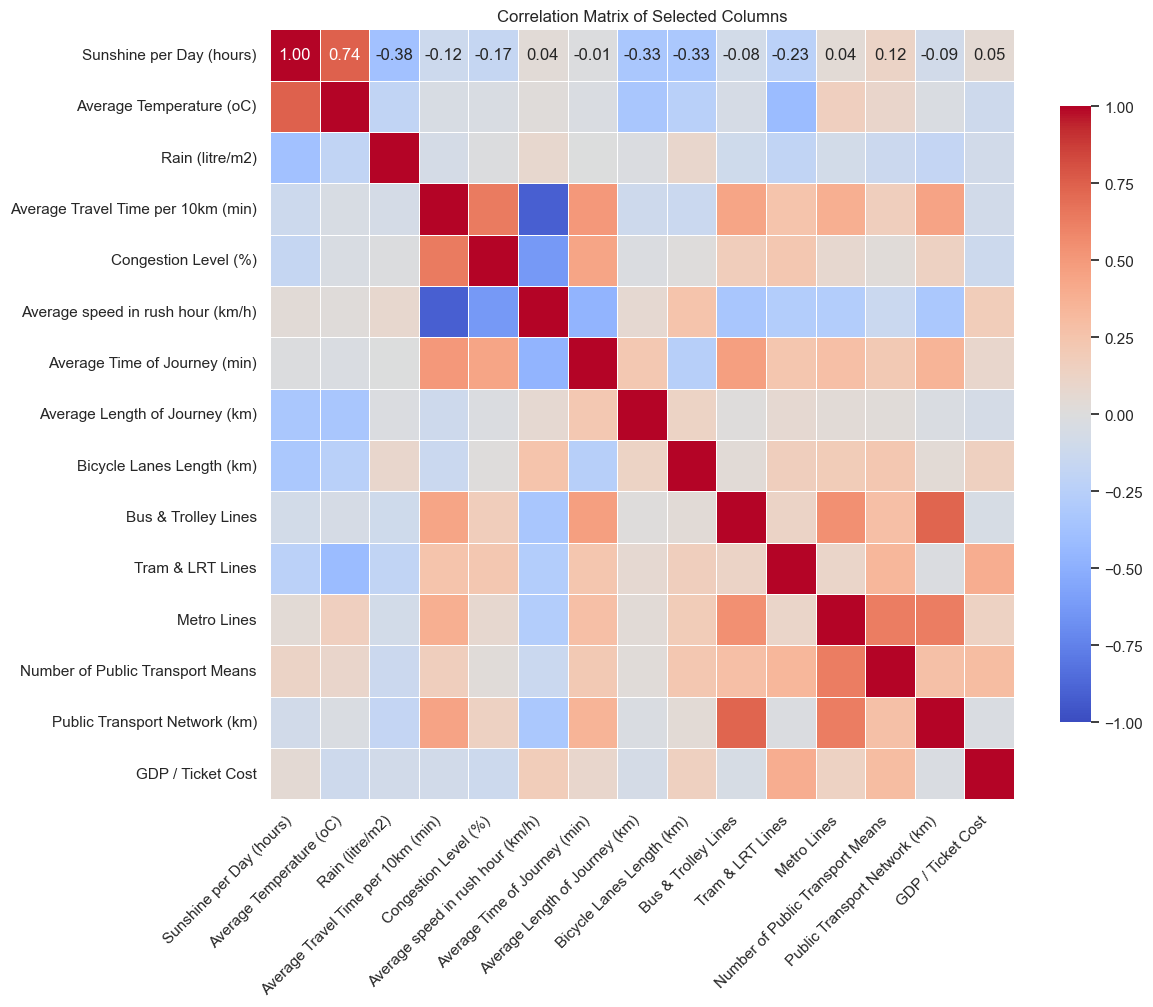

In [128]:
# List of columns to check for correlations
columns_of_interest = [
    'Sunshine per Day (hours)', 'Average Temperature (oC)', 'Rain (litre/m2)', 
    'Average Travel Time per 10km (min)', 'Congestion Level (%)', 'Average speed in rush hour (km/h)',
    'Average Time of Journey (min)', 'Average Length of Journey (km)', 
    'Bicycle Lanes Length (km)', 'Bus & Trolley Lines', 'Tram & LRT Lines', 
    'Metro Lines', 'Number of Public Transport Means', 'Public Transport Network (km)', 
    'GDP / Ticket Cost'
]

# Drop rows with NaN values in the specified columns
df_cleaned_corr = df.dropna(subset=columns_of_interest)

# Compute the correlation matrix
corr_matrix = df_cleaned_corr[columns_of_interest].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

Από το Correlation heatmap καταλαβαίνουμε πως υπάρχουν 4 σημαντικές συσχετίσεις μεταξύ των ανεξάρτητων μεταβλητών.

1. Sunshine - Temperature
2. Travel time per 10 km - Congestion
3. Bus Lines και Metro Lines - Public Transport Network
4. Travel time per 10 km - Average speed in rush hour (αντιστρόφως ανάλογη συσχέτιση)

Είναι φανερό πως η ηλιοφάνεια και η θερμοκρασία έχουν και λογική συνάφεια, όπως και το μέγεθος του δικτύου με τον αριθμό των γραμμών των μέσων. Επομένως, από το προβλεπτικό μοντέλο θα αφαιρεθούν οι στήλες:
- Sunshine per Day
- Public Transport Network
- Average speed in rush hour

In [129]:
# Get descriptive statistics and round to 2 decimal places
modal_split.describe().round(2)

,Walking,Bicycle,Public_Transport,Private_Vehicle
count,81.00,81.00,81.00,81.00
mean,15.36,7.34,27.88,48.76
std,11.19,8.30,11.19,14.65
min,3.00,0.29,6.71,4.00
25%,7.80,2.00,20.60,39.00
50%,11.05,4.30,26.00,50.60
75%,19.00,9.60,35.00,59.17
max,60.00,47.00,59.00,83.69


Βάσει των τιμών στα τεταρτημόρια θα δημιουργηθούν κατηγορίες ποσοστών για κάθε διαφορετικό τρόπο μετακίνησης.

- Walking
1. Below 8 %
2. 8 - 11 %
3. 11 - 19 %
4. Above 19 %

- Bicycle
1. Below 2 %
2. 2 - 5 %
3. 5 - 10 %
4. Above 10 %

- Public Transport
1. Below 20 %
2. 20 - 26 %
3. 26 - 35 %
4. Above 35 %

- Private Vehicle
1. Below 39 %
2. 39 - 50 %
3. 50 - 60 %
4. Above 60 %

In [130]:
# Define the bins and corresponding labels for each dependent variable
walking_bins = [0, 8, 11, 19, float('inf')]
walking_labels = ['Below 8%', '8 - 11%', '11 - 19%', 'Above 19%']

bicycle_bins = [0, 2, 5, 10, float('inf')]
bicycle_labels = ['Below 2%', '2 - 5%', '5 - 10%', 'Above 10%']

public_transport_bins = [0, 20, 26, 35, float('inf')]
public_transport_labels = ['Below 20%', '20 - 26%', '26 - 35%', 'Above 35%']

private_vehicle_bins = [0, 39, 50, 60, float('inf')]
private_vehicle_labels = ['Below 39%', '39 - 50%', '50 - 60%', 'Above 60%']

# Create the new categorical columns
df['Walking_Category'] = pd.cut(df['Walking'], bins=walking_bins, labels=walking_labels, right=False)
df['Bicycle_Category'] = pd.cut(df['Bicycle'], bins=bicycle_bins, labels=bicycle_labels, right=False)
df['Public_Transport_Category'] = pd.cut(df['Public_Transport'], bins=public_transport_bins, labels=public_transport_labels, right=False)
df['Private_Vehicle_Category'] = pd.cut(df['Private_Vehicle'], bins=private_vehicle_bins, labels=private_vehicle_labels, right=False)

# Drop rows with NaN values in the relevant columns
df_cleaned_modal_split = df.dropna(subset=['Walking_Category', 'Bicycle_Category', 'Public_Transport_Category', 'Private_Vehicle_Category'])

# Check the unique values in the new categorical columns
print(df_cleaned_modal_split['Walking_Category'].unique())
print(df_cleaned_modal_split['Bicycle_Category'].unique())
print(df_cleaned_modal_split['Public_Transport_Category'].unique())
print(df_cleaned_modal_split['Private_Vehicle_Category'].unique())

# Print the count of each category
walking_counts = df_cleaned_modal_split['Walking_Category'].value_counts()
bicycle_counts = df_cleaned_modal_split['Bicycle_Category'].value_counts()
public_transport_counts = df_cleaned_modal_split['Public_Transport_Category'].value_counts()
private_vehicle_counts = df_cleaned_modal_split['Private_Vehicle_Category'].value_counts()

print("Walking Category Counts:\n", walking_counts)
print("Bicycle Category Counts:\n", bicycle_counts)
print("Public Transport Category Counts:\n", public_transport_counts)
print("Private Vehicle Category Counts:\n", private_vehicle_counts)

['Above 19%', 'Below 8%', '11 - 19%', '8 - 11%']
Categories (4, object): ['Below 8%' < '8 - 11%' < '11 - 19%' < 'Above 19%']
['5 - 10%', 'Above 10%', '2 - 5%', 'Below 2%']
Categories (4, object): ['Below 2%' < '2 - 5%' < '5 - 10%' < 'Above 10%']
['26 - 35%', '20 - 26%', 'Above 35%', 'Below 20%']
Categories (4, object): ['Below 20%' < '20 - 26%' < '26 - 35%' < 'Above 35%']
['Below 39%', '50 - 60%', '39 - 50%', 'Above 60%']
Categories (4, object): ['Below 39%' < '39 - 50%' < '50 - 60%' < 'Above 60%']
Walking Category Counts:
 Walking_Category
Below 8%     22
Above 19%    21
11 - 19%     20
8 - 11%      18
Name: count, dtype: int64
Bicycle Category Counts:
 Bicycle_Category
2 - 5%       28
5 - 10%      19
Above 10%    19
Below 2%     15
Name: count, dtype: int64
Public Transport Category Counts:
 Public_Transport_Category
20 - 26%     22
Above 35%    22
26 - 35%     19
Below 20%    18
Name: count, dtype: int64
Private Vehicle Category Counts:
 Private_Vehicle_Category
50 - 60%     23
39 -

In [131]:
# Create the new dataframe for classification
df_classification = df.copy()

# Drop rows with NaN values in the relevant columns
independent_vars = [
    'Temperature_Category', 'Rainfall_Category', 'Travel_Time_Category', 'Congestion_Category',
    'Journey_Time_Category', 'Journey_Length_Category', 'Bicycle_Lanes_Length_Category',
    'Transport_Means_Category', 'Bus_Trolley_Lines_Category', 'Tram_LRT_Lines_Category',
    'Metro_Lines_Category', 'GDP_Ticket_Ratio_Category'
]

df_classification = df_classification.dropna(subset=independent_vars + ['Walking_Category', 'Bicycle_Category', 'Public_Transport_Category', 'Private_Vehicle_Category'])

# Convert categorical variables to numerical values if they are not already
X = pd.get_dummies(df_classification[independent_vars], drop_first=True)

# Define the dependent variables (target categories)
y_walking = df_classification['Walking_Category']
y_bicycle = df_classification['Bicycle_Category']
y_public_transport = df_classification['Public_Transport_Category']
y_private_vehicle = df_classification['Private_Vehicle_Category']


In [132]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 76
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Country                                               73 non-null     object  
 1   City                                                  73 non-null     object  
 2   Walking                                               73 non-null     float64 
 3   Bicycle                                               73 non-null     float64 
 4   Public_Transport                                      73 non-null     float64 
 5   Private_Vehicle                                       73 non-null     float64 
 6   Other (%)                                             73 non-null     float64 
 7   Year                                                  73 non-null     int64   
 8   Source (Modal Split)                                  73 

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to train and evaluate a classification model
def train_and_evaluate(X, y, category_name):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Define the model
    model = RandomForestClassifier(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=y.unique().astype(str))
    
    # Print the evaluation metrics
    print(f"Classification Report for {category_name}:\n", report)
    print(f"Accuracy for {category_name}: {accuracy}\n")
    
    return model

# Train and evaluate models for each dependent variable category
model_walking = train_and_evaluate(X, y_walking, 'Walking')
model_bicycle = train_and_evaluate(X, y_bicycle, 'Bicycle')
model_public_transport = train_and_evaluate(X, y_public_transport, 'Public Transport')
model_private_vehicle = train_and_evaluate(X, y_private_vehicle, 'Private Vehicle')


Classification Report for Walking:
               precision    recall  f1-score   support

   Above 19%       1.00      0.33      0.50         6
    Below 8%       0.67      0.50      0.57         4
    11 - 19%       0.38      0.60      0.46         5
     8 - 11%       0.33      0.50      0.40         4

    accuracy                           0.47        19
   macro avg       0.59      0.48      0.48        19
weighted avg       0.62      0.47      0.48        19

Accuracy for Walking: 0.47368421052631576

Classification Report for Bicycle:
               precision    recall  f1-score   support

     5 - 10%       0.38      0.43      0.40         7
   Above 10%       0.33      0.20      0.25         5
      2 - 5%       0.40      0.67      0.50         3
    Below 2%       0.33      0.25      0.29         4

    accuracy                           0.37        19
   macro avg       0.36      0.39      0.36        19
weighted avg       0.36      0.37      0.35        19

Accuracy for Bi

Γενικά, οι δείκτες που περιγράφουν το μοντέλο είναι αρκετά χαμηλοί, φανερώνοντας πως δεν είναι υψηλής ακρίβειας. Παρόλα αυτά, φαίνεται πως το accuracy είναι άνω του 0.5 για τα Μέσα Μαζικής Μεταφοράς και σε δύο κατηγορίες το precision και το recall είναι από μέτρια έως υψηλά. Επομένως, ίσως το μοντέλο θα ήταν χρήσιμο μόνο για τις αλλαγές που θα επέλθουν στα Μ.Μ.Μ..

# Walking
- Accuracy: 47%
- Precision & Recall:
1. Below 8%: Moderate precision and recall.
2. 8 - 11%: Low precision and moderate recall.
3. 11 - 19%: Moderate recall but lower precision.
4. Above 19%: High precision but low recall.

# Bicycle
- Accuracy: 37%
- Precision & Recall:
1. Below 2%: Low precision and recall.
2. 2 - 5%: High recall but lower precision.
3. 5 - 10%: Moderate precision and recall.
4. Above 10%: Low precision and recall.

# Public Transport
- Accuracy: 58%
- Precision & Recall:
1. Below 20%: Moderate precision and low recall.
2. 20 - 26%: Low precision and moderate recall.
3. 26 - 35%: High precision and recall.
4. Above 35%: Moderate precision and recall.

# Private Vehicle
- Accuracy: 32%
- Precision & Recall:
1. Below 39%: Low precision but moderate recall.
2. 39 - 50%: High precision and recall.
3. 50 - 60%: Low precision and recall.
4. Above 60%: Very low precision and recall.

In [134]:
# Function to print feature importances
def print_feature_importances(model, X, category_name):
    importances = model.feature_importances_
    feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    print(f"Feature Importances for {category_name}:\n", feature_importances)

# Print feature importances for each model
print_feature_importances(model_walking, X, 'Walking')
print_feature_importances(model_bicycle, X, 'Bicycle')
print_feature_importances(model_public_transport, X, 'Public Transport')
print_feature_importances(model_private_vehicle, X, 'Private Vehicle')


Feature Importances for Walking:
                                                 Importance
Tram_LRT_Lines_Category_11 - 15 Lines             0.053712
Bus_Trolley_Lines_Category_50 - 100 lines         0.048103
Journey_Time_Category_30 - 35 min                 0.046610
Temperature_Category_Mild                         0.043125
Rainfall_Category_Moderate Rainfall               0.042979
Temperature_Category_Warm                         0.041652
Congestion_Category_Moderate Congestion           0.041342
GDP_Ticket_Ratio_Category_High Ratio              0.040397
Transport_Means_Category_Bus, Tram, Metro         0.039187
GDP_Ticket_Ratio_Category_Moderate Ratio          0.037043
Tram_LRT_Lines_Category_6 - 10 Lines              0.033196
Journey_Time_Category_25 - 30 min                 0.032988
Journey_Length_Category_Medium trip               0.031870
Bus_Trolley_Lines_Category_100 - 150 lines        0.029895
Rainfall_Category_High Rainfall                   0.029795
Travel_Time_Category_2

# Top Features:

- Walking
1. Tram_LRT_Lines_Category_11 - 15 Lines
2. Bus_Trolley_Lines_Category_50 - 100 lines
3. Journey_Time_Category_30 - 35 min

- Bicycle
1. Bicycle_Lanes_Length_Category_Very Long Length
2. Temperature_Category_Warm
3. Temperature_Category_Mild

- Public Transport
1. Travel_Time_Category_10 - 20 min
2. Journey_Time_Category_Above 35 min
3. Tram_LRT_Lines_Category_16+ Lines

- Private Vehicle
1. Journey_Length_Category_Medium trip
2. Bus_Trolley_Lines_Category_Above 150 lines
3. Congestion_Category_Moderate Congestion